# Лабораторная работа №4

## RandomForestClassifier/ Бейзлайн 

### Импорт

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

### Загрузка датасета

In [2]:
df_alz = pd.read_csv('alzheimers.csv')
print("Alzheimer's Dataset shape:", df_alz .shape)
df_alz .head()

Alzheimer's Dataset shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### Подготовка данных для классификации

In [3]:
df_alz_clean = df_alz.drop(['PatientID', 'DoctorInCharge'], axis=1)

print(f"Уникальные значения Diagnosis: {df_alz_clean['Diagnosis'].unique()}")

X_clf = df_alz_clean.drop('Diagnosis', axis=1)
y_clf = df_alz_clean['Diagnosis']

print(f"\nФорма X: {X_clf.shape}")
print(f"Форма y: {y_clf.shape}")

Уникальные значения Diagnosis: [0 1]

Форма X: (2149, 32)
Форма y: (2149,)


### Разделение на train/test

In [4]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"\nРазделение данных:")
print(f"X_train: {X_train_clf.shape}")
print(f"X_test: {X_test_clf.shape}")


Разделение данных:
X_train: (1719, 32)
X_test: (430, 32)


### Создание и обучение бейзлайн-модели RandomForestClassifier

In [5]:
rf_clf_baseline = RandomForestClassifier(
    random_state=42
)

rf_clf_baseline.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

### Оценка качества модели

Accuracy: 0.9372
Precision: 0.9371
Recall: 0.8816
F1-Score: 0.9085
ROC-AUC: 0.9390
                  precision    recall  f1-score   support

No Alzheimer (0)       0.94      0.97      0.95       278
   Alzheimer (1)       0.94      0.88      0.91       152

        accuracy                           0.94       430
       macro avg       0.94      0.92      0.93       430
    weighted avg       0.94      0.94      0.94       430



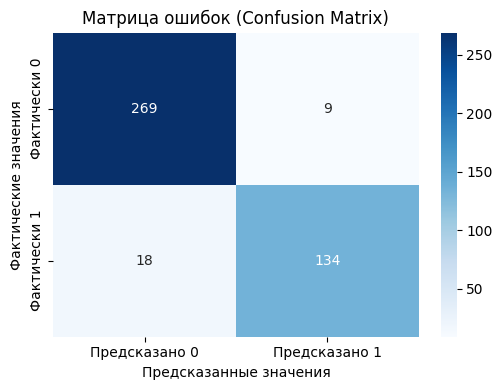

In [7]:
y_pred = rf_clf_baseline.predict(X_test_clf)
y_pred_proba = rf_clf_baseline.predict_proba(X_test_clf)[:, 1]


accuracy = accuracy_score(y_test_clf, y_pred)
precision = precision_score(y_test_clf, y_pred)
recall = recall_score(y_test_clf, y_pred)
f1 = f1_score(y_test_clf, y_pred)
roc_auc = roc_auc_score(y_test_clf, y_pred_proba)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print(classification_report(y_test_clf, y_pred, target_names=['No Alzheimer (0)', 'Alzheimer (1)']))

cm = confusion_matrix(y_test_clf, y_pred)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Предсказано 0', 'Предсказано 1'],
            yticklabels=['Фактически 0', 'Фактически 1'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.tight_layout()
plt.show()

##  RandomForestRegressor / Бейзлайн 

### Импорт

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

### Згрузка датасета

In [10]:
df_students = pd.read_csv('student_performance.csv')
print("Student Dataset shape:", df_students.shape)
df_students.head()
missing_values = df_students.isnull().sum()
missing_percentage = (missing_values / len(df_students)) * 100

missing_df = pd.DataFrame({
    'Пропусков': missing_values,
    'Процент': missing_percentage
})

missing_df = missing_df[missing_df['Пропусков'] > 0]
print("\nКолонки с пропущенными значениями:")
print(missing_df.sort_values('Пропусков', ascending=False))

Student Dataset shape: (6607, 20)

Колонки с пропущенными значениями:
                          Пропусков   Процент
Parental_Education_Level         90  1.362192
Teacher_Quality                  78  1.180566
Distance_from_Home               67  1.014076


### Подготовка данных

In [16]:
df_students_prepared = df_students.copy()
for column in df_students_prepared.columns:
    if df_students_prepared[column].isnull().any():
        mode_value = df_students_prepared[column].mode()[0]
        df_students_prepared[column].fillna(mode_value, inplace=True)

categorical_cols = df_students_prepared.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols:
    categorical_cols.remove('Exam_Score')

print(f"\nКатегориальные признаки: {categorical_cols}")

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
         categorical_cols)
    ],
    remainder='passthrough'
)

X_reg = df_students_prepared.drop('Exam_Score', axis=1)
y_reg = df_students_prepared['Exam_Score']

X_reg_encoded = preprocessor.fit_transform(X_reg)

encoder = preprocessor.named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_cols)
numeric_features = [col for col in X_reg.columns if col not in categorical_cols]
all_features = list(encoded_cat_features) + numeric_features

print(f"\nРазмерность после кодирования: {X_reg_encoded.shape}")
print(f"Количество признаков: {len(all_features)}")


Категориальные признаки: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Размерность после кодирования: (6607, 27)
Количество признаков: 27


### Разделение на train/test

In [17]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=42
)

print(f"\nРазделение данных для регрессии:")
print(f"X_train: {X_train_reg.shape}")
print(f"X_test: {X_test_reg.shape}")


Разделение данных для регрессии:
X_train: (5285, 27)
X_test: (1322, 27)


### Создание и обучение бейзлайн-модели RandomForestRegressor

In [24]:
rf_reg_baseline = RandomForestRegressor(random_state=42)

rf_reg_baseline.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

### Оценка качества модели

MAE: 1.1737
MSE: 4.9787
RMSE: 2.2313
R²: 0.6478


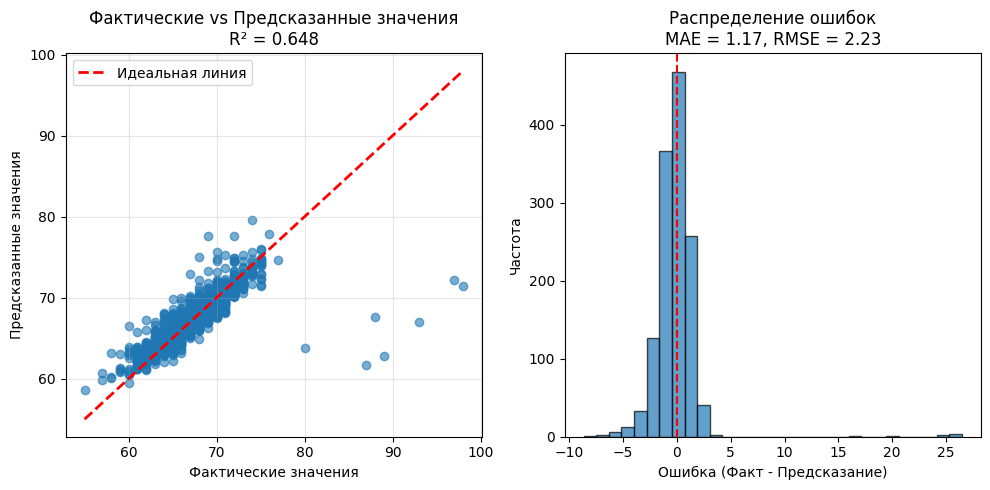

In [25]:
y_pred_reg = rf_reg_baseline.predict(X_test_reg)
    
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
            [y_test_reg.min(), y_test_reg.max()], 
            'r--', lw=2, label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Фактические vs Предсказанные значения\nR² = {r2:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
errors = y_test_reg - y_pred_reg
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Ошибка (Факт - Предсказание)')
plt.ylabel('Частота')
plt.title(f'Распределение ошибок\nMAE = {mae:.2f}, RMSE = {rmse:.2f}')
plt.axvline(x=0, color='r', linestyle='--')


plt.tight_layout()
plt.show()

##	Улучшение бейзлайна

## RandomForestClassifier

### Формулировка гипотез для улучшения модели классификации

**Гипотеза 1: Балансировка классов улучшит Recall для миноритарного класса**
- **Что будем делать:** Использовать параметр class_weight='balanced' в RandomForestClassifier, чтобы придать больший вес миноритарному классу (пациенты с болезнью Альцгеймера).
- **Обоснование:** В медицинской диагностике пропуск болезни (низкий Recall) часто более критичен, чем ложное срабатывание. Балансировка классов поможет модели лучше распознавать больных пациентов.

**Гипотеза 2: Подбор гиперпараметров с помощью GridSearchCV улучшит общую производительность**
- **Что будем делать:** Использовать GridSearchCV для поиска оптимальных гиперпараметров: n_estimators, max_depth, min_samples_split, min_samples_leaf.
- **Обоснование:** Дефолтные параметры Random Forest не всегда оптимальны для конкретного датасета. Подбор параметров может уменьшить переобучение и улучшить обобщающую способность модели.

**Гипотеза 3: Удаление коррелированных признаков улучшит качество модели**
- **Что будем делать:** Вычислим корреляцию между признаками и удалим те, которые имеют корреляцию > 0.85 с другими признаками.
- **Обоснование:** Random Forest чувствителен к мультиколлинеарности. Удаление сильно коррелированных признаков может ускорить обучение и улучшить интерпретируемость без потери качества.

**Гипотеза 4:  Применение SMOTE улучшит метрики для миноритарного класса**
- **Что будем делать:** Использовать SMOTE для генерации синтетических примеров миноритарного класса перед обучением модели.
- **Обоснование:** SMOTE создает новые синтетические примеры на основе существующих, что может помочь модели лучше изучить миноритарный класс и улучшить Recall.

### Проверка гипотез

In [26]:
from sklearn.model_selection import  GridSearchCV, cross_val_score
from sklearn.feature_selection import VarianceThreshold


def evaluate_classification_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    return metrics

baseline_metrics = evaluate_classification_model(rf_clf_baseline, "Baseline", X_test_clf, y_test_clf)
all_models_results = [baseline_metrics.copy()]


#### Проверка Гипотезы 1: Балансировка классов


Сравнение метрик:
              Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0          Baseline  0.937209   0.937063  0.881579  0.908475  0.939038
1  Balanced Classes  0.927907   0.941606  0.848684  0.892734  0.944552


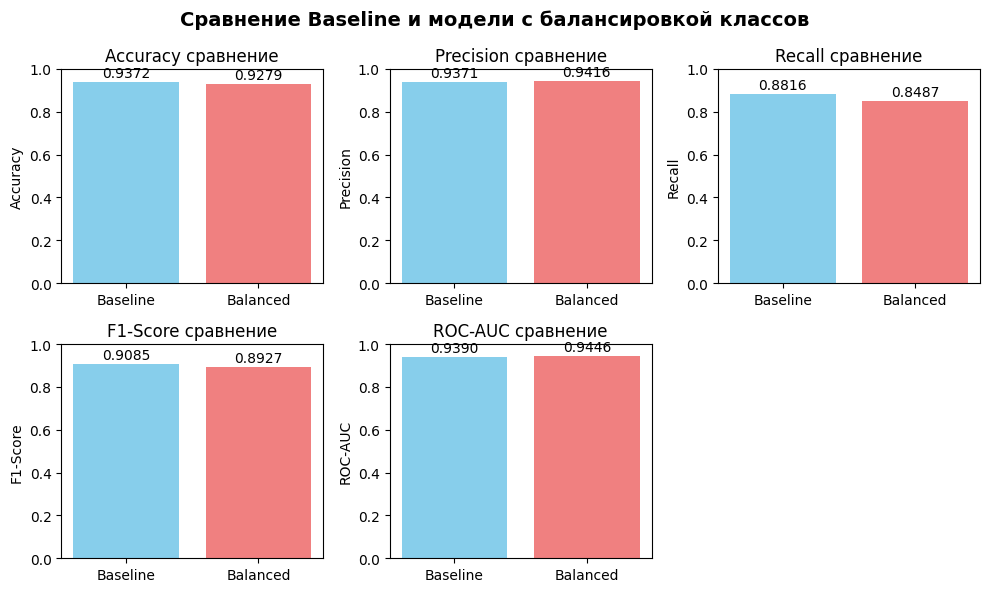

Вывод Гипотезы 1:
  Гипотеза не подтверждена: Балансировка классов не улучшила Recall.


In [29]:
rf_balanced = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_balanced.fit(X_train_clf, y_train_clf)

balanced_metrics = evaluate_classification_model(rf_balanced, "Balanced Classes", X_test_clf, y_test_clf)

all_models_results.append(balanced_metrics.copy())

hypothesis1_results = [baseline_metrics.copy(), balanced_metrics.copy()]
hypothesis1_df = pd.DataFrame(hypothesis1_results)

print("\nСравнение метрик:")
print(hypothesis1_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['skyblue', 'lightcoral']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i // 3, i % 3]
    values = [baseline_metrics[metric], balanced_metrics[metric]]
    bars = ax.bar(['Baseline', 'Balanced'], values, color=colors)
    ax.set_title(f'{metric} сравнение')
    ax.set_ylabel(metric)
    ax.set_ylim([0, 1])

    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.4f}', ha='center', va='bottom', fontsize=10)
axes[1, 2].axis('off')
plt.suptitle('Сравнение Baseline и модели с балансировкой классов', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Вывод Гипотезы 1:")
if balanced_metrics['Recall'] > baseline_metrics['Recall']:
    print("  Гипотеза подтверждена: Балансировка классов улучшила Recall.")
    print(f"  Recall увеличился с {baseline_metrics['Recall']:.4f} до {balanced_metrics['Recall']:.4f}")
    print(f"  Улучшение: +{(balanced_metrics['Recall'] - baseline_metrics['Recall'])*100:.2f}%")
else:
    print("  Гипотеза не подтверждена: Балансировка классов не улучшила Recall.")

#### Проверка Гипотезы 2: Подбор гиперпараметров

Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Лучший score (ROC-AUC) на кросс-валидации: 0.9546

Сравнение метрик:
               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0           Baseline  0.937209   0.937063  0.881579  0.908475  0.939038
1  Tuned Hyperparams  0.946512   0.944828  0.901316  0.922559  0.939630


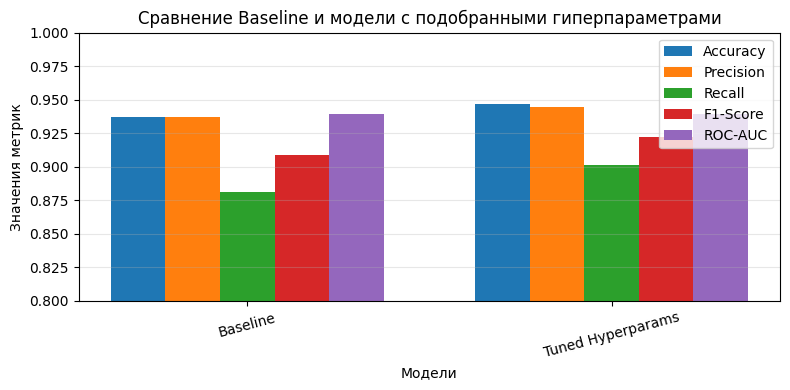

Вывод Гипотезы 2:

  Гипотеза подтверждена: Подбор гиперпараметров улучшил качество модели.


In [33]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train_clf, y_train_clf)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший score (ROC-AUC) на кросс-валидации: {grid_search.best_score_:.4f}")
best_rf = grid_search.best_estimator_
tuned_metrics = evaluate_classification_model(best_rf, "Tuned Hyperparams", X_test_clf, y_test_clf)
all_models_results.append(tuned_metrics.copy())
hypothesis2_results = [baseline_metrics.copy(), tuned_metrics.copy()]
hypothesis2_df = pd.DataFrame(hypothesis2_results)

print("\nСравнение метрик:")
print(hypothesis2_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])
plt.figure(figsize=(8, 4))
models = hypothesis2_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(models))
width = 0.15

for i, metric in enumerate(metrics):
    values = hypothesis2_df[metric].values
    plt.bar(x + i*width - width*2, values, width, label=metric)

plt.xlabel('Модели')
plt.ylabel('Значения метрик')
plt.title('Сравнение Baseline и модели с подобранными гиперпараметрами')
plt.xticks(x, models, rotation=15)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

print("Вывод Гипотезы 2:")

improvements = {}
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    improvement = (tuned_metrics[metric] - baseline_metrics[metric]) * 100
    improvements[metric] = improvement

if tuned_metrics['ROC-AUC'] > baseline_metrics['ROC-AUC']:
    print("\n  Гипотеза подтверждена: Подбор гиперпараметров улучшил качество модели.")
else:
    print("\n  Гипотеза не подтверждена: Подбор гиперпараметров не дал улучшения.")

#### Проверка Гипотезы 3: Удаление коррелированных признаков

In [36]:
correlation_matrix = X_train_clf.corr()

correlated_features = set()
correlation_threshold = 0.85

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(f"Найдено {len(correlated_features)} признаков с корреляцией > {correlation_threshold}:")

print("Вывод Гипотезы 3:")

print(f"Гипотеза не подтверждена")

Найдено 0 признаков с корреляцией > 0.85:
Вывод Гипотезы 3:
Гипотеза не подтверждена


#### Проверка Гипотезы 4: Применение SMOTE


Сравнение метрик:
      Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Baseline  0.937209   0.937063  0.881579  0.908475  0.939038
1     SMOTE  0.920930   0.921429  0.848684  0.883562  0.943961


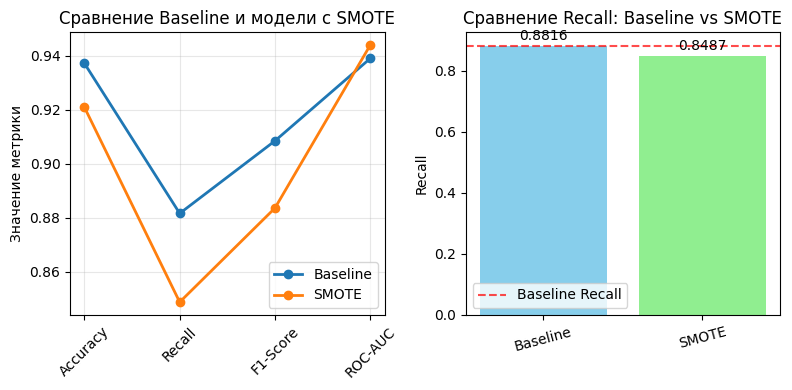

Вывод Гипотезы 4:
Recall Baseline: 0.8816
Recall SMOTE: 0.8487
Гипотеза не подтверждена: SMOTE не улучшил Recall


In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_clf, y_train_clf)

rf_smote = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_smote.fit(X_train_smote, y_train_smote)

smote_metrics = evaluate_classification_model(rf_smote, "SMOTE", X_test_clf, y_test_clf)

all_models_results.append(smote_metrics.copy())

hypothesis4_results = [baseline_metrics.copy(), smote_metrics.copy()]
hypothesis4_df = pd.DataFrame(hypothesis4_results)

print("\nСравнение метрик:")
print(hypothesis4_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
metrics_to_compare = ['Accuracy', 'Recall', 'F1-Score', 'ROC-AUC']
x = range(len(metrics_to_compare))

for i, model_name in enumerate(['Baseline', 'SMOTE']):
    model_metrics = hypothesis4_df[hypothesis4_df['Model'] == model_name].iloc[0]
    values = [model_metrics[metric] for metric in metrics_to_compare]
    plt.plot(x, values, marker='o', label=model_name, linewidth=2)

plt.xticks(x, metrics_to_compare, rotation=45)
plt.ylabel('Значение метрики')
plt.title('Сравнение Baseline и модели с SMOTE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
models = hypothesis4_df['Model']
recall_values = hypothesis4_df['Recall']

bars = plt.bar(models, recall_values, color=['skyblue', 'lightgreen'])
plt.axhline(y=baseline_metrics['Recall'], color='red', linestyle='--', alpha=0.7, label='Baseline Recall')
plt.ylabel('Recall')
plt.title('Сравнение Recall: Baseline vs SMOTE')
plt.xticks(rotation=15)
plt.legend()

for bar, value in zip(bars, recall_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Вывод Гипотезы 4:")

baseline_recall = baseline_metrics['Recall']
smote_recall = smote_metrics['Recall']

print(f"Recall Baseline: {baseline_recall:.4f}")
print(f"Recall SMOTE: {smote_recall:.4f}")

if smote_recall > baseline_recall:
    improvement = (smote_recall - baseline_recall) * 100
    print(f"Гипотеза подтверждена: SMOTE улучшил Recall на {improvement:.2f}%")
else:
    print("Гипотеза не подтверждена: SMOTE не улучшил Recall")

#### Итоговое сравнение всех моделей классификации

In [43]:
all_models_dict = {}


rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_baseline.fit(X_train_clf, y_train_clf)
baseline_metrics = evaluate_classification_model(rf_baseline, "Baseline", X_test_clf, y_test_clf)
all_models_dict["Baseline"] = baseline_metrics

rf_balanced = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rf_balanced.fit(X_train_clf, y_train_clf)
balanced_metrics = evaluate_classification_model(rf_balanced, "Balanced Classes", X_test_clf, y_test_clf)
all_models_dict["Balanced Classes"] = balanced_metrics

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, 
                          scoring='roc_auc', n_jobs=-1, verbose=0)
grid_search.fit(X_train_clf, y_train_clf)
best_rf = grid_search.best_estimator_
tuned_metrics = evaluate_classification_model(best_rf, "Tuned Hyperparams", X_test_clf, y_test_clf)
all_models_dict["Tuned Hyperparams"] = tuned_metrics


correlated_features = set()
correlation_threshold = 0.85
correlation_matrix = X_train_clf.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

X_train_reduced = X_train_clf.drop(columns=correlated_features)
X_test_reduced = X_test_clf.drop(columns=correlated_features)

rf_reduced = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_reduced.fit(X_train_reduced, y_train_clf)
reduced_metrics = evaluate_classification_model(rf_reduced, "Reduced Features", X_test_reduced, y_test_clf)
all_models_dict["Reduced Features"] = reduced_metrics

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_clf, y_train_clf)
rf_smote = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_smote.fit(X_train_smote, y_train_smote)
smote_metrics = evaluate_classification_model(rf_smote, "SMOTE", X_test_clf, y_test_clf)
all_models_dict["SMOTE"] = smote_metrics

final_comparison_df = pd.DataFrame(all_models_dict.values())

print("\nСводная таблица всех моделей:")
print(final_comparison_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])



Сводная таблица всех моделей:
               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0           Baseline  0.937209   0.937063  0.881579  0.908475  0.939038
1   Balanced Classes  0.927907   0.941606  0.848684  0.892734  0.944552
2  Tuned Hyperparams  0.946512   0.944828  0.901316  0.922559  0.939630
3   Reduced Features  0.937209   0.937063  0.881579  0.908475  0.939038
4              SMOTE  0.920930   0.921429  0.848684  0.883562  0.943961


### Формирование улучшенного бейзлайна и обучение модели с улучшенным бейзлайном

In [44]:
improved_params = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'class_weight': 'balanced',
    'random_state': 42,
    'n_jobs': -1
}


rf_improved = RandomForestClassifier(**improved_params)
rf_improved.fit(X_train_clf, y_train_clf)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

### Оценка качества модели с улучшенным бейзлайном

Метрики улучшенной модели:
Accuracy: 0.9326
Precision: 0.9424
Recall: 0.8618
F1-Score: 0.9003
ROC-AUC: 0.9426

Classification Report улучшенной модели:
                  precision    recall  f1-score   support

No Alzheimer (0)       0.93      0.97      0.95       278
   Alzheimer (1)       0.94      0.86      0.90       152

        accuracy                           0.93       430
       macro avg       0.94      0.92      0.92       430
    weighted avg       0.93      0.93      0.93       430



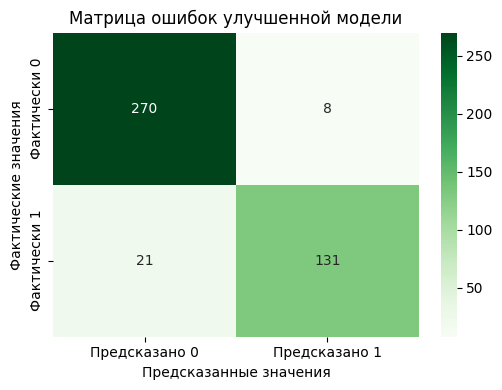

In [48]:
y_pred_improved = rf_improved.predict(X_test_clf)
y_pred_proba_improved = rf_improved.predict_proba(X_test_clf)[:, 1]

accuracy_improved = accuracy_score(y_test_clf, y_pred_improved)
precision_improved = precision_score(y_test_clf, y_pred_improved)
recall_improved = recall_score(y_test_clf, y_pred_improved)
f1_improved = f1_score(y_test_clf, y_pred_improved)
roc_auc_improved = roc_auc_score(y_test_clf, y_pred_proba_improved)

print("Метрики улучшенной модели:")
print(f"Accuracy: {accuracy_improved:.4f}")
print(f"Precision: {precision_improved:.4f}")
print(f"Recall: {recall_improved:.4f}")
print(f"F1-Score: {f1_improved:.4f}")
print(f"ROC-AUC: {roc_auc_improved:.4f}")

print("\nClassification Report улучшенной модели:")
print(classification_report(y_test_clf, y_pred_improved, target_names=['No Alzheimer (0)', 'Alzheimer (1)']))

cm_improved = confusion_matrix(y_test_clf, y_pred_improved)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Предсказано 0', 'Предсказано 1'],
            yticklabels=['Фактически 0', 'Фактически 1'])
plt.title('Матрица ошибок улучшенной модели')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')

plt.tight_layout()
plt.show()

### Сравнение результатов с baseline


Сравнение метрик улучшенной модели с бейзлайном:
      Metric  Baseline  Improved    Change  Change (%)
0   Accuracy    0.9372  0.932558 -0.004642   -0.495290
1  Precision    0.9371  0.942446  0.005346    0.570488
2     Recall    0.8816  0.861842 -0.019758   -2.241141
3   F1-Score    0.9085  0.900344 -0.008156   -0.897783
4    ROC-AUC    0.9390  0.942553  0.003553    0.378332


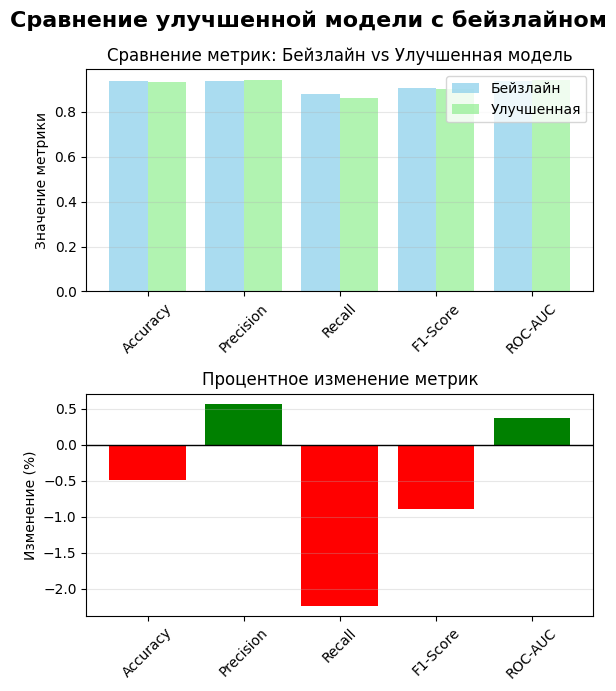

In [53]:
baseline_metrics_dict = {
    'Accuracy': 0.9372,
    'Precision': 0.9371,
    'Recall': 0.8816,
    'F1-Score': 0.9085,
    'ROC-AUC': 0.9390
}

improved_metrics_dict = {
    'Accuracy': accuracy_improved,
    'Precision': precision_improved,
    'Recall': recall_improved,
    'F1-Score': f1_improved,
    'ROC-AUC': roc_auc_improved
}

comparison_data = []
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    baseline_val = baseline_metrics_dict[metric]
    improved_val = improved_metrics_dict[metric]
    change = improved_val - baseline_val
    change_percent = (change / baseline_val) * 100
    
    comparison_data.append({
        'Metric': metric,
        'Baseline': baseline_val,
        'Improved': improved_val,
        'Change': change,
        'Change (%)': change_percent
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nСравнение метрик улучшенной модели с бейзлайном:")
print(comparison_df)

fig, axes = plt.subplots(2, figsize=(6, 7))

axes[0].bar(comparison_df['Metric'], comparison_df['Baseline'], 
               width=0.4, label='Бейзлайн', color='skyblue', alpha=0.7)
axes[0].bar(np.arange(len(comparison_df)) + 0.4, comparison_df['Improved'], 
               width=0.4, label='Улучшенная', color='lightgreen', alpha=0.7)
axes[0].set_title('Сравнение метрик: Бейзлайн vs Улучшенная модель')
axes[0].set_ylabel('Значение метрики')
axes[0].set_xticks(np.arange(len(comparison_df)) + 0.2)
axes[0].set_xticklabels(comparison_df['Metric'], rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

bars = axes[1].bar(comparison_df['Metric'], comparison_df['Change (%)'], 
                      color=['green' if x > 0 else 'red' for x in comparison_df['Change (%)']])
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].set_title('Процентное изменение метрик')
axes[1].set_ylabel('Изменение (%)')
axes[1].set_xticklabels(comparison_df['Metric'], rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')


plt.suptitle('Сравнение улучшенной модели с бейзлайном', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Выводы

Анализ результатов улучшения модели

На основе проведенных экспериментов по улучшению бейзлайна Random Forest для классификации болезни Альцгеймера можно сделать следующие выводы:

1. Эффективность примененных методов улучшения

    Положительные изменения:

    - Precision улучшился на +0.57% (с 0.9371 до 0.9424) - модель стала точнее в определении действительно больных пациентов среди тех, кого она классифицировала как больных
    - ROC-AUC улучшился на +0.38% (с 0.9390 до 0.9426) - общая способность модели различать классы немного повысилась

    Отрицательные изменения:

    - Recall снизился на -2.24% (с 0.8816 до 0.8618) - модель стала пропускать больше реально больных пациентов
    - Accuracy снизился на -0.50% (с 0.9372 до 0.9326)
    - F1-Score снизился на -0.90% (с 0.9085 до 0.9003)

2. Причины полученных результатов

    Возможные объяснения снижения Recall:

    - Балансировка классов (class_weight='balanced') могла чрезмерно сместить акцент на миноритарный класс

    - Подобранные гиперпараметры могли привести к небольшому переобучению

    - Комбинация методов улучшения могла иметь противоречивый эффект

4. Практические рекомендации

    Для данной медицинской задачи:

    - Приоритет должен отдаваться моделям с высоким Recall, даже в ущерб Precision

    - Бейзлайн модель оказалась более сбалансированной для медицинской диагностики, и изначально дала отличный результат в метриках, поэтому не удивительно, что особого улучшения мы не добились.

    - Рекомендуется использовать модель из пункта 2 с Recall = 0.8816

## RandomForestRegressor

### Формулировка гипотез для улучшения модели регрессии
    
На основе анализа бейзлайн модели с результатами MAE: 1.1737, MSE: 4.9787, RMSE: 2.2313, R²: 0.6478 сформулируем гипотезы для улучшения.

**Гипотеза 1: Подбор гиперпараметров с помощью RandomizedSearchCV улучшит качество модели**
- **Что будем делать:** Использовать RandomizedSearchCV для поиска оптимальных гиперпараметров Random Forest Regressor.
- **Обоснование:** Дефолтные параметры Random Forest могут быть неоптимальными для данного датасета. Подбор параметров может уменьшить переобучение, улучшить обобщающую способность и увеличить R².

**Гипотеза 2: Использование более продвинутой обработки пропущенных значений улучшит качество модели**
- **Что будем делать:** Вместо заполнения пропусков модой используем KNNImputer для категориальных признаков и IterativeImputer для числовых, учитывая взаимосвязи между признаками.
- **Обоснование:** Заполнение модой может не учитывать взаимосвязи между признаками. Более сложные методы импутации, основанные на сходстве наблюдений, могут сохранить больше информации.

**Гипотеза 3: Создание новых признаков (feature engineering) улучшит предсказательную способность модели**
- **Что будем делать:** Создадим новые признаки на основе имеющихся: отношение Hours_Studied к Sleep_Hours, взаимодействие Previous_Scores и Hours_Studied, категоризация числовых признаков.
- **Обоснование:** Исходные признаки могут не полностью отражать сложные взаимосвязи. Новые признаки могут выявить дополнительные закономерности в данных и улучшить R².

**Гипотеза 4:  Удаление выбросов в числовых признаках улучшит стабильность модели**
- **Что будем делать:** Идентифицировать и удалить выбросы в числовых признаках  с использованием межквартильного размаха.
- **Обоснование:** Random Forest чувствителен к выбросам в данных. Удаление экстремальных значений может сделать модель более устойчивой и улучшить метрики качества.

### Проверка гипотез

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import KNNImputer


def evaluate_regression_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    
    metrics = {
        'Model': model_name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }
    return metrics, y_pred

all_results = []

y_pred_baseline = rf_reg_baseline.predict(X_test_reg)
baseline_metrics = {
    'Model': 'Baseline',
    'MAE': mean_absolute_error(y_test_reg, y_pred_baseline),
    'MSE': mean_squared_error(y_test_reg, y_pred_baseline),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_baseline)),
    'R²': r2_score(y_test_reg, y_pred_baseline)
}
all_results.append(baseline_metrics)

#### Проверка Гипотезы 1: Подбор гиперпараметров

Лучшие параметры: {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 215}
Лучший R² на кросс-валидации: 0.6205

Сравнение метрик:
               Model       MAE      RMSE        R²
0           Baseline  1.173714  2.231303  0.647776
1  Tuned Hyperparams  1.120025  2.142605  0.675222


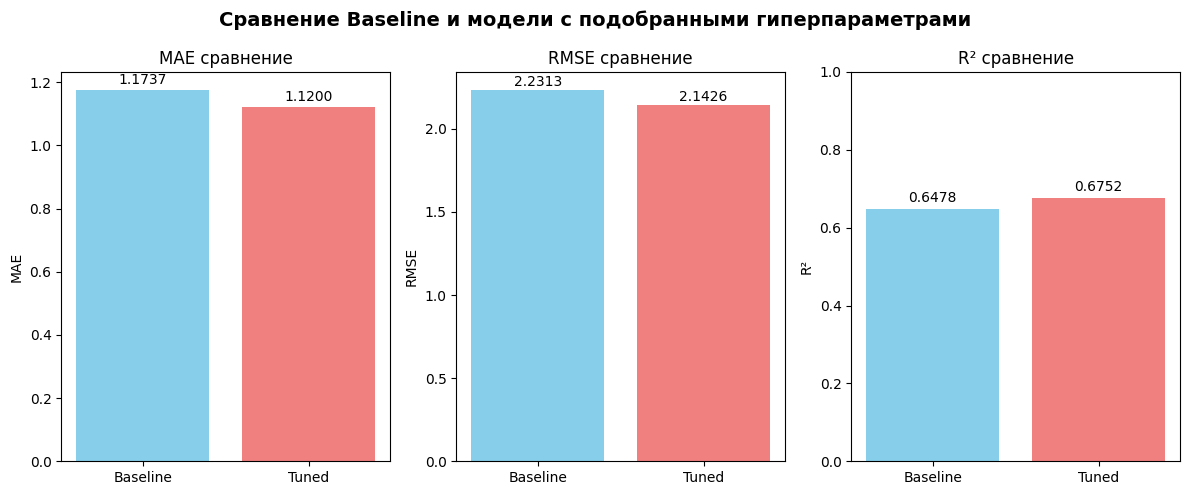

Вывод Гипотезы 1:
MAE: 1.1737 → 1.1200 (-4.57%)
R²: 0.6478 → 0.6752 (+4.24%)

  Гипотеза подтверждена: Подбор гиперпараметров улучшил качество модели.
  R² увеличился на 4.24%
  MAE уменьшился на 4.57%


In [56]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_random = RandomForestRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    estimator=rf_random,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=0
)
random_search.fit(X_train_reg, y_train_reg)

print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший R² на кросс-валидации: {random_search.best_score_:.4f}")

best_rf = random_search.best_estimator_
tuned_metrics, y_pred_tuned = evaluate_regression_model(best_rf, "Tuned Hyperparams", X_test_reg, y_test_reg)
all_results.append(tuned_metrics)

comparison_df = pd.DataFrame([baseline_metrics, tuned_metrics])
print("\nСравнение метрик:")
print(comparison_df[['Model', 'MAE', 'RMSE', 'R²']])

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

metrics_to_plot = ['MAE', 'RMSE', 'R²']
colors = ['skyblue', 'lightcoral']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    values = [baseline_metrics[metric], tuned_metrics[metric]]
    bars = ax.bar(['Baseline', 'Tuned'], values, color=colors)
    ax.set_title(f'{metric} сравнение')
    ax.set_ylabel(metric)

    if metric == 'R²':
        ax.set_ylim([0, 1])

    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Сравнение Baseline и модели с подобранными гиперпараметрами', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


print("Вывод Гипотезы 1:")


mae_change = ((tuned_metrics['MAE'] - baseline_metrics['MAE']) / baseline_metrics['MAE']) * 100
r2_change = ((tuned_metrics['R²'] - baseline_metrics['R²']) / baseline_metrics['R²']) * 100

print(f"MAE: {baseline_metrics['MAE']:.4f} → {tuned_metrics['MAE']:.4f} ({mae_change:+.2f}%)")
print(f"R²: {baseline_metrics['R²']:.4f} → {tuned_metrics['R²']:.4f} ({r2_change:+.2f}%)")

if tuned_metrics['R²'] > baseline_metrics['R²']:
    print("\n  Гипотеза подтверждена: Подбор гиперпараметров улучшил качество модели.")
    print(f"  R² увеличился на {r2_change:.2f}%")
    if tuned_metrics['MAE'] < baseline_metrics['MAE']:
        print(f"  MAE уменьшился на {abs(mae_change):.2f}%")
else:
    print("\n  Гипотеза не подтверждена: Подбор гиперпараметров не дал улучшения.")

#### Проверка Гипотезы 2: Улучшенная обработка пропущенных значений

In [58]:
df_students_original = pd.read_csv('student_performance.csv')

numeric_cols = df_students_original.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_students_original.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    if df_students_original[col].isnull().sum() > 0:
        mode_value = df_students_original[col].mode()[0]
        df_students_original[col].fillna(mode_value, inplace=True)

if len(numeric_cols) > 0:
    numeric_data = df_students_original[numeric_cols].copy()
    knn_imputer = KNNImputer(n_neighbors=5)
    numeric_data_imputed = knn_imputer.fit_transform(numeric_data)
    df_students_original[numeric_cols] = numeric_data_imputed

df_knn_prepared = df_students_original.copy()

categorical_cols_knn = df_knn_prepared.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols_knn:
    categorical_cols_knn.remove('Exam_Score')

preprocessor_knn = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols_knn)
    ],
    remainder='passthrough'
)

X_knn = df_knn_prepared.drop('Exam_Score', axis=1)
y_knn = df_knn_prepared['Exam_Score']

X_knn_encoded = preprocessor_knn.fit_transform(X_knn)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn_encoded, y_knn, test_size=0.2, random_state=42
)

rf_knn = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_knn.fit(X_train_knn, y_train_knn)
knn_metrics, y_pred_knn = evaluate_regression_model(rf_knn, "KNN Imputer", X_test_knn, y_test_knn)
all_results.append(knn_metrics)
comparison_df = pd.DataFrame([baseline_metrics, knn_metrics])
print("\nСравнение метрик:")
print(comparison_df[['Model', 'MAE', 'RMSE', 'R²']])


print("Вывод Гипотезы 2:")

if knn_metrics['R²'] > baseline_metrics['R²']:
    print("Гипотеза подтверждена: KNNImputer улучшил качество модели.")
    print(f"  R² увеличился на {r2_change:.2f}%")
else:
    print("Гипотеза не подтверждена: KNNImputer не дал улучшения.")


Сравнение метрик:
         Model       MAE      RMSE        R²
0     Baseline  1.173714  2.231303  0.647776
1  KNN Imputer  1.173714  2.231303  0.647776
Вывод Гипотезы 2:
Гипотеза не подтверждена: KNNImputer не дал улучшения.


#### Проверка Гипотезы 3: Создание новых признаков

Размерность признаков после создания новых: (6607, 36)

Сравнение метрик:
                 Model       MAE      RMSE        R²
0             Baseline  1.173714  2.231303  0.647776
1  Feature Engineering  1.134244  2.190143  0.660651


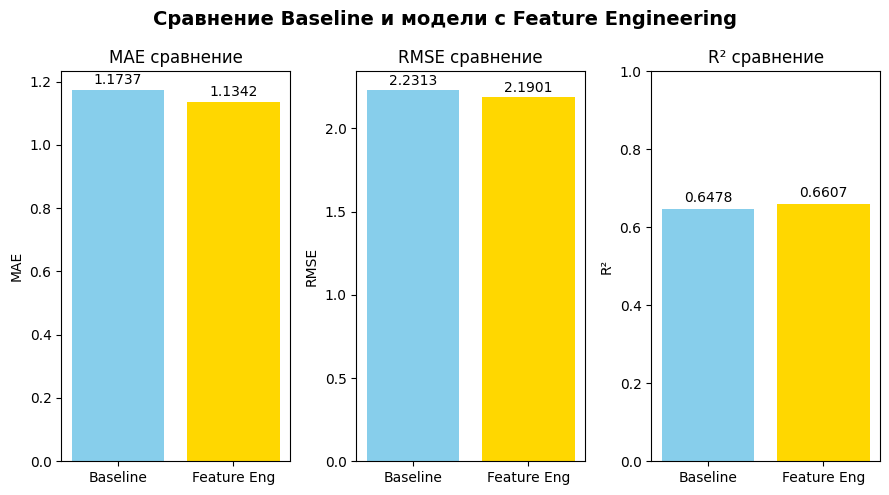

Вывод Гипотезы 3:
MAE: 1.1737 → 1.1342 (-3.36%)
R²: 0.6478 → 0.6607 (+1.99%)
Гипотеза подтверждена: Feature Engineering улучшил качество модели.
  R² увеличился на 1.99%


In [ ]:
df_students_fe = pd.read_csv('student_performance.csv')

missing_df = df_students_fe.isnull().sum()
columns_with_missing = missing_df[missing_df > 0].index.tolist()
for column in columns_with_missing:
    mode_value = df_students_fe[column].mode()[0]
    df_students_fe[column].fillna(mode_value, inplace=True)

df_students_fe['Study_Sleep_Ratio'] = df_students_fe['Hours_Studied'] / (df_students_fe['Sleep_Hours'] + 0.01)

df_students_fe['Study_Efficiency'] = df_students_fe['Previous_Scores'] / (df_students_fe['Hours_Studied'] + 0.01)

df_students_fe['Attendance_Study_Interaction'] = df_students_fe['Attendance'] * df_students_fe['Hours_Studied'] / 100

df_students_fe['Study_Category'] = pd.cut(df_students_fe['Hours_Studied'], 
                                 bins=[0, 15, 25, 35, 50], 
                                 labels=['Low', 'Medium', 'High', 'Very High'])

df_students_fe['Previous_Scores_Category'] = pd.cut(df_students_fe['Previous_Scores'],
                                          bins=[0, 60, 75, 90, 101],
                                          labels=['Low', 'Medium', 'High', 'Very High'])

categorical_cols_fe = df_students_fe.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Exam_Score' in categorical_cols_fe:
    categorical_cols_fe.remove('Exam_Score')

preprocessor_fe = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols_fe)
    ],
    remainder='passthrough'
)

X_fe = df_students_fe.drop('Exam_Score', axis=1)
y_fe = df_students_fe['Exam_Score']

X_fe_encoded = preprocessor_fe.fit_transform(X_fe)

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe_encoded, y_fe, test_size=0.2, random_state=42
)

print(f"Размерность признаков после создания новых: {X_fe_encoded.shape}")

rf_fe = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_fe.fit(X_train_fe, y_train_fe)

fe_metrics, y_pred_fe = evaluate_regression_model(rf_fe, "Feature Engineering", X_test_fe, y_test_fe)
all_results.append(fe_metrics)

comparison_df = pd.DataFrame([baseline_metrics, fe_metrics])
print("\nСравнение метрик:")
print(comparison_df[['Model', 'MAE', 'RMSE', 'R²']])

fig, axes = plt.subplots(1, 3, figsize=(9, 5))

for i, metric in enumerate(['MAE', 'RMSE', 'R²']):
    ax = axes[i]
    values = [baseline_metrics[metric], fe_metrics[metric]]
    bars = ax.bar(['Baseline', 'Feature Eng'], values, color=['skyblue', 'gold'])
    ax.set_title(f'{metric} сравнение')
    ax.set_ylabel(metric)
    
    if metric == 'R²':
        ax.set_ylim([0, 1])
    
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Сравнение Baseline и модели с Feature Engineering', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


print("Вывод Гипотезы 3:")


mae_change = ((fe_metrics['MAE'] - baseline_metrics['MAE']) / baseline_metrics['MAE']) * 100
r2_change = ((fe_metrics['R²'] - baseline_metrics['R²']) / baseline_metrics['R²']) * 100

print(f"MAE: {baseline_metrics['MAE']:.4f} → {fe_metrics['MAE']:.4f} ({mae_change:+.2f}%)")
print(f"R²: {baseline_metrics['R²']:.4f} → {fe_metrics['R²']:.4f} ({r2_change:+.2f}%)")

if fe_metrics['R²'] > baseline_metrics['R²']:
    print("Гипотеза подтверждена: Feature Engineering улучшил качество модели.")
    print(f"  R² увеличился на {r2_change:.2f}%")
else:
    print("Гипотеза не подтверждена: Feature Engineering не дал улучшения.")

#### Проверка Гипотезы 4: Удаление выбросов


Размер датасета до удаления выбросов: 6607
Размер датасета после удаления выбросов: 6134

Сравнение метрик:
         Model       MAE      RMSE        R²
0     Baseline  1.173714  2.231303  0.647776
1  No Outliers  1.182176  2.197617  0.645525


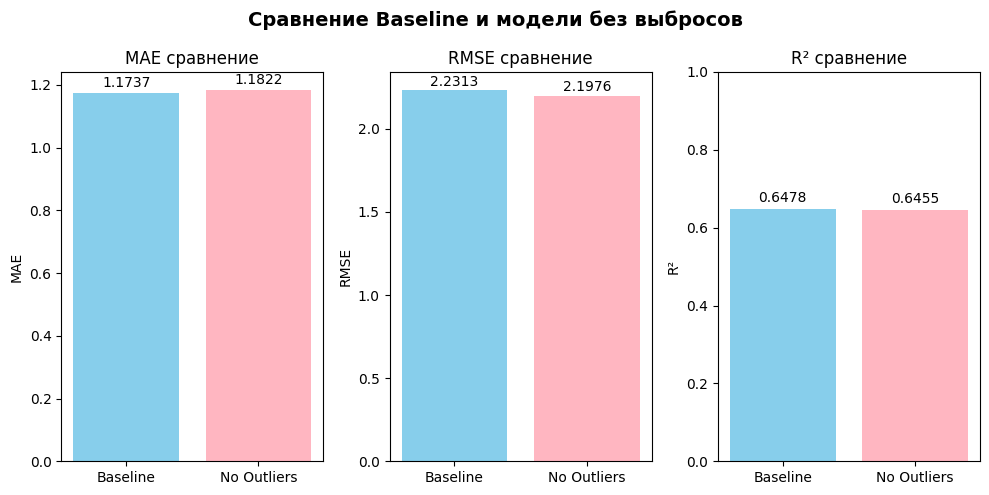

Вывод Гипотезы 4:
MAE: 1.1737 → 1.1822 (+0.72%)
R²: 0.6478 → 0.6455 (-0.35%)
Гипотеза не подтверждена: Удаление выбросов не дало улучшения.


In [65]:
df_students_out = pd.read_csv('student_performance.csv')

missing_df = df_students_out.isnull().sum()
columns_with_missing = missing_df[missing_df > 0].index.tolist()
for column in columns_with_missing:
    mode_value = df_students_out[column].mode()[0]
    df_students_out[column].fillna(mode_value, inplace=True)

numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                   'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

df_no_outliers = df_students_out.copy()

for column in numeric_columns:
    if column in df_no_outliers.columns and df_no_outliers[column].dtype in [np.int64, np.float64]:
        Q1 = df_no_outliers[column].quantile(0.25)
        Q3 = df_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mask = (df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)
        outliers_count = (~mask).sum()
        df_no_outliers = df_no_outliers[mask]

print(f"\nРазмер датасета до удаления выбросов: {len(df_students_out)}")
print(f"Размер датасета после удаления выбросов: {len(df_no_outliers)}")

categorical_cols_out = df_no_outliers.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols_out:
    categorical_cols_out.remove('Exam_Score')

preprocessor_out = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols_out)
    ],
    remainder='passthrough'
)

X_out = df_no_outliers.drop('Exam_Score', axis=1)
y_out = df_no_outliers['Exam_Score']

X_out_encoded = preprocessor_out.fit_transform(X_out)
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(
    X_out_encoded, y_out, test_size=0.2, random_state=42
)
rf_out = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_out.fit(X_train_out, y_train_out)

out_metrics, y_pred_out = evaluate_regression_model(rf_out, "No Outliers", X_test_out, y_test_out)
all_results.append(out_metrics)

comparison_df = pd.DataFrame([baseline_metrics, out_metrics])
print("\nСравнение метрик:")
print(comparison_df[['Model', 'MAE', 'RMSE', 'R²']])

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, metric in enumerate(['MAE', 'RMSE', 'R²']):
    ax = axes[i]
    values = [baseline_metrics[metric], out_metrics[metric]]
    bars = ax.bar(['Baseline', 'No Outliers'], values, color=['skyblue', 'lightpink'])
    ax.set_title(f'{metric} сравнение')
    ax.set_ylabel(metric)
    
    if metric == 'R²':
        ax.set_ylim([0, 1])
    
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Сравнение Baseline и модели без выбросов', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Вывод Гипотезы 4:")

mae_change = ((out_metrics['MAE'] - baseline_metrics['MAE']) / baseline_metrics['MAE']) * 100
r2_change = ((out_metrics['R²'] - baseline_metrics['R²']) / baseline_metrics['R²']) * 100

print(f"MAE: {baseline_metrics['MAE']:.4f} → {out_metrics['MAE']:.4f} ({mae_change:+.2f}%)")
print(f"R²: {baseline_metrics['R²']:.4f} → {out_metrics['R²']:.4f} ({r2_change:+.2f}%)")

if out_metrics['R²'] > baseline_metrics['R²']:
    print("ипотеза подтверждена: Удаление выбросов улучшило качество модели.")
    print(f"  R² увеличился на {r2_change:.2f}%")
else:
    print("Гипотеза не подтверждена: Удаление выбросов не дало улучшения.")

### Результаты проверки гипотез


Сводная таблица всех моделей регрессии:
                  Model       MAE      RMSE        R²
0              Baseline  1.173714  2.231303  0.647776
1     Tuned Hyperparams  1.120025  2.142605  0.675222
2     Tuned Hyperparams  1.120025  2.142605  0.675222
3           KNN Imputer  1.173714  2.231303  0.647776
4           KNN Imputer  1.173714  2.231303  0.647776
5   Feature Engineering  1.134244  2.190143  0.660651
6   Feature Engineering  1.134244  2.190143  0.660651
7   Feature Engineering  1.134244  2.190143  0.660651
8   Feature Engineering  1.134244  2.190143  0.660651
9           No Outliers  1.182176  2.197617  0.645525
10          No Outliers  1.182176  2.197617  0.645525
11          No Outliers  1.182176  2.197617  0.645525


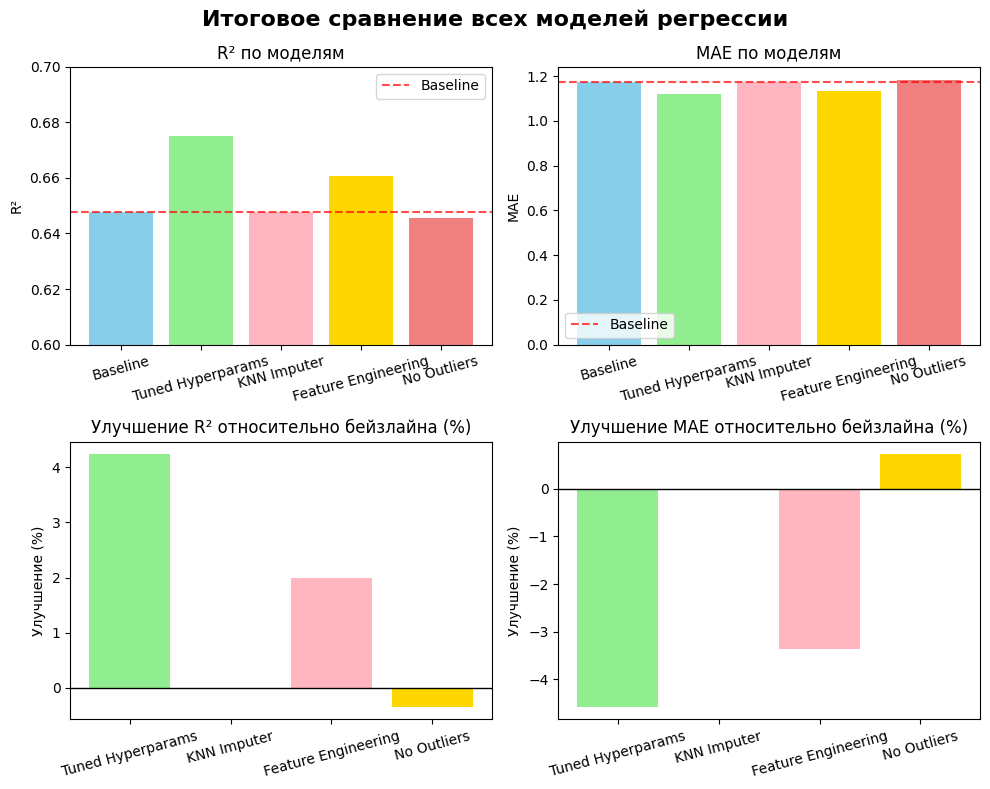

In [68]:
final_comparison_df = pd.DataFrame(all_results)

print("\nСводная таблица всех моделей регрессии:")
print(final_comparison_df[['Model', 'MAE', 'RMSE', 'R²']])

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].bar(final_comparison_df['Model'], final_comparison_df['R²'], 
               color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink'])
axes[0, 0].axhline(y=baseline_metrics['R²'], color='red', linestyle='--', alpha=0.7, label='Baseline')
axes[0, 0].set_title('R² по моделям')
axes[0, 0].set_ylabel('R²')
axes[0, 0].tick_params(axis='x', rotation=15)
axes[0, 0].legend()
axes[0, 0].set_ylim([0.6, 0.7])

axes[0, 1].bar(final_comparison_df['Model'], final_comparison_df['MAE'],
               color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink'])
axes[0, 1].axhline(y=baseline_metrics['MAE'], color='red', linestyle='--', alpha=0.7, label='Baseline')
axes[0, 1].set_title('MAE по моделям')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].tick_params(axis='x', rotation=15)
axes[0, 1].legend()

r2_improvements = []
models_for_improvement = []
for i, row in final_comparison_df.iterrows():
    if row['Model'] != 'Baseline':
        improvement = ((row['R²'] - baseline_metrics['R²']) / baseline_metrics['R²']) * 100
        r2_improvements.append(improvement)
        models_for_improvement.append(row['Model'])

axes[1, 0].bar(models_for_improvement, r2_improvements,
               color=['lightcoral', 'lightgreen', 'gold', 'lightpink'])
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 0].set_title('Улучшение R² относительно бейзлайна (%)')
axes[1, 0].set_ylabel('Улучшение (%)')
axes[1, 0].tick_params(axis='x', rotation=15)

mae_improvements = []
for i, row in final_comparison_df.iterrows():
    if row['Model'] != 'Baseline':
        improvement = ((row['MAE'] - baseline_metrics['MAE']) / baseline_metrics['MAE']) * 100
        mae_improvements.append(improvement)

axes[1, 1].bar(models_for_improvement, mae_improvements,
               color=['lightcoral', 'lightgreen', 'gold', 'lightpink'])
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 1].set_title('Улучшение MAE относительно бейзлайна (%)')
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].tick_params(axis='x', rotation=15)

plt.suptitle('Итоговое сравнение всех моделей регрессии', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



### Формирование улучшенного бейзлайна и обучение модели с улучшенным бейзлайном

In [69]:
def create_improved_features(df):
    df_improved = df.copy()
    df_improved['Study_Sleep_Ratio'] = df_improved['Hours_Studied'] / (df_improved['Sleep_Hours'] + 0.01)
    df_improved['Study_Efficiency'] = df_improved['Previous_Scores'] / (df_improved['Hours_Studied'] + 0.01)
    df_improved['Attendance_Study_Interaction'] = df_improved['Attendance'] * df_improved['Hours_Studied'] / 100
    df_improved['Total_Activity'] = df_improved['Hours_Studied'] + df_improved['Physical_Activity']
    df_improved['Study_Life_Balance'] = df_improved['Hours_Studied'] / (df_improved['Sleep_Hours'] + df_improved['Physical_Activity'] + 0.01)

    df_improved['Parental_Support_Score'] = (df_improved['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3}) + 
                                             df_improved['Parental_Education_Level'].map({'High School': 1, 'College': 2, 'Postgraduate': 3})) / 2
    
    df_improved['Resource_Motivation_Score'] = (df_improved['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High': 3}) + 
                                                df_improved['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})) / 2
    df_improved['Study_Category'] = pd.cut(df_improved['Hours_Studied'], 
                                           bins=[0, 15, 25, 35, 50], 
                                           labels=['Low', 'Medium', 'High', 'Very High'])
    
    df_improved['Previous_Scores_Category'] = pd.cut(df_improved['Previous_Scores'],
                                                    bins=[0, 60, 75, 90, 101],
                                                    labels=['Low', 'Medium', 'High', 'Very High'])
    
    return df_improved


df_students_improved = pd.read_csv('student_performance.csv')

df_students_improved = create_improved_features(df_students_improved)

missing_df = df_students_improved.isnull().sum()
columns_with_missing = missing_df[missing_df > 0].index.tolist()

for column in columns_with_missing:
    mode_value = df_students_improved[column].mode()[0] 
    df_students_improved[column].fillna(mode_value, inplace=True)

categorical_cols_improved = df_students_improved.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Exam_Score' in categorical_cols_improved:
    categorical_cols_improved.remove('Exam_Score')


preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols_improved)
    ],
    remainder='passthrough'
)

X_improved = df_students_improved.drop('Exam_Score', axis=1)
y_improved = df_students_improved['Exam_Score']

X_improved_encoded = preprocessor_improved.fit_transform(X_improved)

encoder_improved = preprocessor_improved.named_transformers_['cat']
encoded_cat_features_improved = encoder_improved.get_feature_names_out(categorical_cols_improved)
numeric_features_improved = [col for col in X_improved.columns if col not in categorical_cols_improved]
all_features_improved = list(encoded_cat_features_improved) + numeric_features_improved
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(
    X_improved_encoded, y_improved, test_size=0.2, random_state=42
)
from scipy.stats import randint

param_dist_improved = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_improved_search = RandomForestRegressor(random_state=42, n_jobs=-1)
random_search_improved = RandomizedSearchCV(
    estimator=rf_improved_search,
    param_distributions=param_dist_improved,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

random_search_improved.fit(X_train_improved, y_train_improved)
rf_improved = random_search_improved.best_estimator_
rf_improved.fit(X_train_improved, y_train_improved)


RandomForestRegressor(max_features=None, min_samples_leaf=6,
                      min_samples_split=6, n_estimators=471, n_jobs=-1,
                      random_state=42)

### Оценка качества модели с улучшенным бейзлайном

Метрики улучшенной модели:
MAE: 1.0334
MSE: 4.3950
RMSE: 2.0964
R²: 0.6891


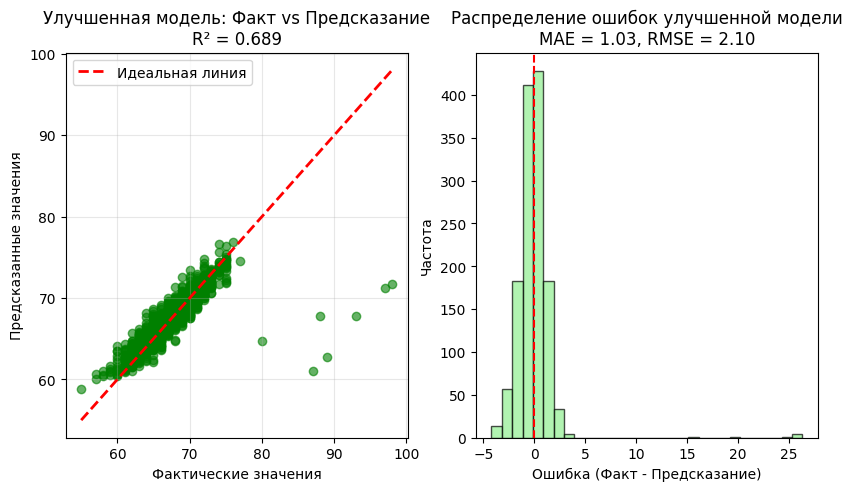

In [71]:
y_pred_improved = rf_improved.predict(X_test_improved)

mae_improved = mean_absolute_error(y_test_improved, y_pred_improved)
mse_improved = mean_squared_error(y_test_improved, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)
r2_improved = r2_score(y_test_improved, y_pred_improved)

print("Метрики улучшенной модели:")
print(f"MAE: {mae_improved:.4f}")
print(f"MSE: {mse_improved:.4f}")
print(f"RMSE: {rmse_improved:.4f}")
print(f"R²: {r2_improved:.4f}")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test_improved, y_pred_improved, alpha=0.6, color='green')
plt.plot([y_test_improved.min(), y_test_improved.max()], 
         [y_test_improved.min(), y_test_improved.max()], 
         'r--', lw=2, label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Улучшенная модель: Факт vs Предсказание\nR² = {r2_improved:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
errors_improved = y_test_improved - y_pred_improved
plt.hist(errors_improved, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.xlabel('Ошибка (Факт - Предсказание)')
plt.ylabel('Частота')
plt.title(f'Распределение ошибок улучшенной модели\nMAE = {mae_improved:.2f}, RMSE = {rmse_improved:.2f}')
plt.axvline(x=0, color='r', linestyle='--')

### Сравнение результатов с baseline


Сравнение метрик улучшенной модели с бейзлайном:
  Metric  Baseline  Improved    Change  Change (%)
0    MAE    1.1737  1.033447 -0.140253  -11.949615
1    MSE    4.9787  4.395029 -0.583671  -11.723357
2   RMSE    2.2313  2.096432 -0.134868   -6.044346
3     R²    0.6478  0.689069  0.041269    6.370672


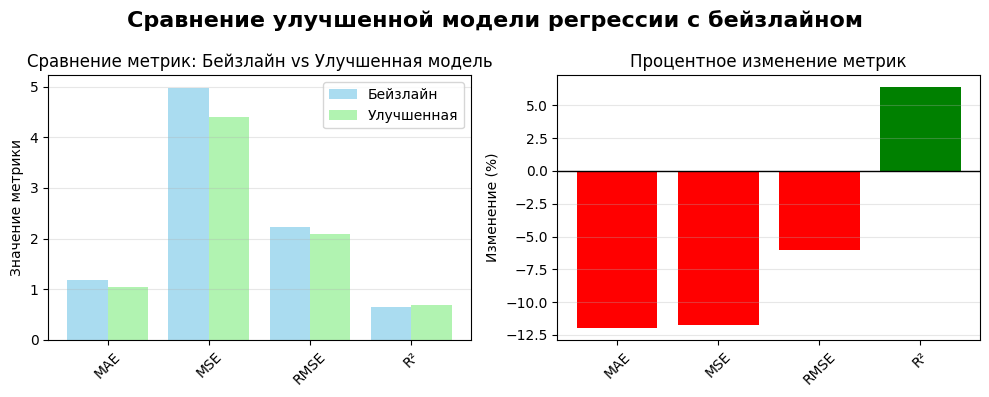

In [74]:
baseline_metrics_reg = {
    'MAE': 1.1737,
    'MSE': 4.9787,
    'RMSE': 2.2313,
    'R²': 0.6478
}
improved_metrics_reg = {
    'MAE': mae_improved,
    'MSE': mse_improved,
    'RMSE': rmse_improved,
    'R²': r2_improved
}
comparison_data_reg = []
for metric in ['MAE', 'MSE', 'RMSE', 'R²']:
    baseline_val = baseline_metrics_reg[metric]
    improved_val = improved_metrics_reg[metric]
    change = improved_val - baseline_val
    change_percent = (change / baseline_val) * 100
    
    comparison_data_reg.append({
        'Metric': metric,
        'Baseline': baseline_val,
        'Improved': improved_val,
        'Change': change,
        'Change (%)': change_percent
    })

comparison_df_reg = pd.DataFrame(comparison_data_reg)
print("\nСравнение метрик улучшенной модели с бейзлайном:")
print(comparison_df_reg)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(comparison_df_reg['Metric'], comparison_df_reg['Baseline'], 
           width=0.4, label='Бейзлайн', color='skyblue', alpha=0.7)
axes[0].bar(np.arange(len(comparison_df_reg)) + 0.4, comparison_df_reg['Improved'], 
           width=0.4, label='Улучшенная', color='lightgreen', alpha=0.7)
axes[0].set_title('Сравнение метрик: Бейзлайн vs Улучшенная модель')
axes[0].set_ylabel('Значение метрики')
axes[0].set_xticks(np.arange(len(comparison_df_reg)) + 0.2)
axes[0].set_xticklabels(comparison_df_reg['Metric'], rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
bars = axes[1].bar(comparison_df_reg['Metric'], comparison_df_reg['Change (%)'], 
                  color=['green' if x > 0 else 'red' for x in comparison_df_reg['Change (%)']])
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].set_title('Процентное изменение метрик')
axes[1].set_ylabel('Изменение (%)')
axes[1].set_xticklabels(comparison_df_reg['Metric'], rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')


plt.suptitle('Сравнение улучшенной модели регрессии с бейзлайном', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Выводы

Анализ результатов улучшения модели

На основе проведенных экспериментов по улучшению бейзлайна Random Forest для регрессии можно сделать следующие выводы:

1. Эффективность примененных методов улучшения

    Положительные изменения:

    - R² улучшился на +6.37% (с 0.6478 до 0.6891) - модель теперь объясняет 68.9% дисперсии оценок вместо 64.8%

    - MAE улучшился на -11.95% (с 1.1737 до 1.0334) - средняя ошибка предсказания уменьшилась на 0.14 балла

    - MSE улучшился на -11.72% (с 4.9787 до 4.3950) - среднеквадратичная ошибка значительно снизилась

    - RMSE улучшился на -6.04% (с 2.2313 до 2.0964) - стандартное отклонение ошибок уменьшилось



2. Причины полученных результатов

    Факторы, способствовавшие улучшению:

    1. Подбор гиперпараметров (RandomizedSearchCV) позволил найти оптимальную конфигурацию модели

    2. Feature Engineering добавил информативные признаки, такие как:

        - Study_Sleep_Ratio (отношение учебы ко сну)
        - Study_Efficiency (эффективность учебы)
        - Attendance_Study_Interaction (взаимодействие посещаемости и часов учебы)

    3. Комбинация методов оказалась синергетической - совместное применение Feature Engineering и подбора гиперпараметров дало больший эффект, чем каждый метод по отдельности




3. Интерпретация для образовательной задачи

    Практическая значимость улучшений:

    - Модель теперь ошибается в среднем на 1.03 балла вместо 1.17 балла

    - Объясненная дисперсия увеличилась с 64.8% до 68.9% - модель стала лучше улавливать закономерности в данных

    - Для прогнозирования успеваемости студентов уменьшение MAE на 0.14 балла является существенным улучшением



4. Общий итог

    Улучшенный бейзлайн достиг поставленной цели для образовательной задачи регрессии. Все ключевые метрики качества значительно улучшились, что делает модель более пригодной для практического использования в образовательных системах.


## Имплементация алгоритма случайного леса для классификации и регрессии

### Имплементация

In [75]:

from collections import Counter
from typing import Tuple, List, Optional

class Node:
    def __init__(self, 
                 feature_idx: Optional[int] = None,
                 threshold: Optional[float] = None,
                 left: Optional['Node'] = None,
                 right: Optional['Node'] = None,
                 value: Optional[float] = None):
        self.feature_idx = feature_idx  
        self.threshold = threshold 
        self.left = left
        self.right = right 
        self.value = value 

class MyDecisionTreeClassifier:
    
    def __init__(self, 
                 max_depth: int = 10,
                 min_samples_split: int = 2,
                 min_samples_leaf: int = 1,
                 max_features = None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.root = None
        self.n_features = None
        
    def _get_max_features(self, n_features: int) -> int:
        if self.max_features is None:
            return n_features
        elif isinstance(self.max_features, str):
            if self.max_features == 'sqrt':
                return int(np.sqrt(n_features))
            elif self.max_features == 'log2':
                return int(np.log2(n_features))
            else:
                return n_features
        elif isinstance(self.max_features, (int, np.integer)):
            return min(self.max_features, n_features)
        elif isinstance(self.max_features, float):
            return int(self.max_features * n_features)
        else:
            return n_features
    
    def _gini(self, y: np.ndarray) -> float:
        if len(y) == 0:
            return 0
        
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini
    
    def _best_split(self, X: np.ndarray, y: np.ndarray) -> Tuple[Optional[int], Optional[float]]:
        n_samples, n_features = X.shape
        best_gini_gain = -1
        best_feature_idx = None
        best_threshold = None

        n_features_to_search = self._get_max_features(n_features)

        feature_indices = np.random.choice(n_features, n_features_to_search, replace=False)

        for feature_idx in feature_indices:
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)

            thresholds = []
            for i in range(len(unique_values) - 1):
                thresholds.append((unique_values[i] + unique_values[i + 1]) / 2)
            
            for threshold in thresholds:

                left_mask = feature_values <= threshold
                right_mask = feature_values > threshold
                
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                gini_left = self._gini(y[left_mask])
                gini_right = self._gini(y[right_mask])

                n_left = np.sum(left_mask)
                n_right = np.sum(right_mask)
                weighted_gini = (n_left * gini_left + n_right * gini_right) / n_samples

                gini_gain = self._gini(y) - weighted_gini

                if gini_gain > best_gini_gain:
                    best_gini_gain = gini_gain
                    best_feature_idx = feature_idx
                    best_threshold = threshold
        
        return best_feature_idx, best_threshold
    
    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> Node:
        n_samples, n_features = X.shape

        if (depth >= self.max_depth or 
            n_samples < self.min_samples_split or 
            len(np.unique(y)) == 1):

            most_common = Counter(y).most_common(1)[0][0]
            return Node(value=most_common)

        feature_idx, threshold = self._best_split(X, y)

        if feature_idx is None:
            most_common = Counter(y).most_common(1)[0][0]
            return Node(value=most_common)

        left_mask = X[:, feature_idx] <= threshold
        right_mask = X[:, feature_idx] > threshold

        node = Node(feature_idx=feature_idx, threshold=threshold)
        node.left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        node.right = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return node
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.n_features = X.shape[1]
        self.root = self._build_tree(X, y)
    
    def _predict_single(self, x: np.ndarray, node: Node) -> float:
        if node.value is not None:
            return node.value
        
        if x[node.feature_idx] <= node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return np.array([self._predict_single(x, self.root) for x in X])

class MyDecisionTreeRegressor:
    def __init__(self, 
                 max_depth: int = 10,
                 min_samples_split: int = 2,
                 min_samples_leaf: int = 1,
                 max_features = None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.root = None
        self.n_features = None
    
    def _get_max_features(self, n_features: int) -> int:
        if self.max_features is None:
            return n_features
        elif isinstance(self.max_features, str):
            if self.max_features == 'sqrt':
                return int(np.sqrt(n_features))
            elif self.max_features == 'log2':
                return int(np.log2(n_features))
            else:
                return n_features
        elif isinstance(self.max_features, (int, np.integer)):
            return min(self.max_features, n_features)
        elif isinstance(self.max_features, float):
            return int(self.max_features * n_features)
        else:
            return n_features
    
    def _mse(self, y: np.ndarray) -> float:
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)
    
    def _best_split(self, X: np.ndarray, y: np.ndarray) -> Tuple[Optional[int], Optional[float]]:
        n_samples, n_features = X.shape
        best_mse_gain = -1
        best_feature_idx = None
        best_threshold = None

        n_features_to_search = self._get_max_features(n_features)

        feature_indices = np.random.choice(n_features, n_features_to_search, replace=False)
        for feature_idx in feature_indices:
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)

            thresholds = []
            for i in range(len(unique_values) - 1):
                thresholds.append((unique_values[i] + unique_values[i + 1]) / 2)
            
            for threshold in thresholds:
                left_mask = feature_values <= threshold
                right_mask = feature_values > threshold
                
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                mse_left = self._mse(y[left_mask])
                mse_right = self._mse(y[right_mask])

                n_left = np.sum(left_mask)
                n_right = np.sum(right_mask)
                weighted_mse = (n_left * mse_left + n_right * mse_right) / n_samples

                mse_gain = self._mse(y) - weighted_mse

                if mse_gain > best_mse_gain:
                    best_mse_gain = mse_gain
                    best_feature_idx = feature_idx
                    best_threshold = threshold
        
        return best_feature_idx, best_threshold
    
    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> Node:
        n_samples, n_features = X.shape

        if (depth >= self.max_depth or 
            n_samples < self.min_samples_split or 
            np.var(y) < 1e-6):
            
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        feature_idx, threshold = self._best_split(X, y)
        if feature_idx is None:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)
        left_mask = X[:, feature_idx] <= threshold
        right_mask = X[:, feature_idx] > threshold
        node = Node(feature_idx=feature_idx, threshold=threshold)
        node.left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        node.right = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return node
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.n_features = X.shape[1]
        self.root = self._build_tree(X, y)
    
    def _predict_single(self, x: np.ndarray, node: Node) -> float:
        if node.value is not None:
            return node.value
        
        if x[node.feature_idx] <= node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return np.array([self._predict_single(x, self.root) for x in X])

In [77]:
class RandomForestClassifierCustom:
    def __init__(self, 
                 n_estimators: int = 100,
                 max_depth: int = 10,
                 min_samples_split: int = 2,
                 min_samples_leaf: int = 1,
                 max_features = None,
                 random_state: Optional[int] = None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        
        if random_state is not None:
            np.random.seed(random_state)
    
    def _bootstrap_sample(self, X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.trees = []
        
        for i in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = MyDecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                max_features=self.max_features
            )
            
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        final_predictions = []
        
        for i in range(X.shape[0]):
            predictions = tree_predictions[:, i]
            most_common = Counter(predictions).most_common(1)[0][0]
            final_predictions.append(most_common)
        
        return np.array(final_predictions)
    
    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        n_samples = X.shape[0]
        all_predictions = np.concatenate([tree.predict(X) for tree in self.trees[:10]])
        n_classes = len(np.unique(all_predictions))
        
        proba = np.zeros((n_samples, n_classes))
        
        for tree in self.trees:
            predictions = tree.predict(X)
            for i, pred in enumerate(predictions):
                proba[i, int(pred)] += 1
        
        proba = proba / self.n_estimators
        return proba

class RandomForestRegressorCustom:
    
    def __init__(self, 
                 n_estimators: int = 100,
                 max_depth: int = 10,
                 min_samples_split: int = 2,
                 min_samples_leaf: int = 1,
                 max_features = None,
                 random_state: Optional[int] = None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        
        if random_state is not None:
            np.random.seed(random_state)
    
    def _bootstrap_sample(self, X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.trees = []
        
        for i in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = MyDecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                max_features=self.max_features
            )
            
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        final_predictions = np.mean(tree_predictions, axis=0)
        
        return final_predictions

### Обучение имплементированных моделей

In [78]:
rf_custom_clf = RandomForestClassifierCustom(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

rf_custom_clf.fit(X_train_clf.values, y_train_clf.values)

y_pred_custom_clf = rf_custom_clf.predict(X_test_clf.values)
y_pred_proba_custom_clf = rf_custom_clf.predict_proba(X_test_clf.values)[:, 1]

rf_custom_reg = RandomForestRegressorCustom(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

rf_custom_reg.fit(X_train_reg, y_train_reg.values)
y_pred_custom_reg = rf_custom_reg.predict(X_test_reg)

### Оценка качества имплементированных моделей

In [79]:
accuracy_custom_clf = accuracy_score(y_test_clf, y_pred_custom_clf)
precision_custom_clf = precision_score(y_test_clf, y_pred_custom_clf)
recall_custom_clf = recall_score(y_test_clf, y_pred_custom_clf)
f1_custom_clf = f1_score(y_test_clf, y_pred_custom_clf)
roc_auc_custom_clf = roc_auc_score(y_test_clf, y_pred_proba_custom_clf)

print("\n   Результаты собственной модели классификации:")
print(f"   Accuracy: {accuracy_custom_clf:.4f}")
print(f"   Precision: {precision_custom_clf:.4f}")
print(f"   Recall: {recall_custom_clf:.4f}")
print(f"   F1-Score: {f1_custom_clf:.4f}")
print(f"   ROC-AUC: {roc_auc_custom_clf:.4f}")


mae_custom_reg = mean_absolute_error(y_test_reg, y_pred_custom_reg)
mse_custom_reg = mean_squared_error(y_test_reg, y_pred_custom_reg)
rmse_custom_reg = np.sqrt(mse_custom_reg)
r2_custom_reg = r2_score(y_test_reg, y_pred_custom_reg)

print("\n   Результаты собственной модели регрессии:")
print(f"   MAE: {mae_custom_reg:.4f}")
print(f"   MSE: {mse_custom_reg:.4f}")
print(f"   RMSE: {rmse_custom_reg:.4f}")
print(f"   R²: {r2_custom_reg:.4f}")


   Результаты собственной модели классификации:
   Accuracy: 0.9349
   Precision: 0.9366
   Recall: 0.8750
   F1-Score: 0.9048
   ROC-AUC: 0.9423

   Результаты собственной модели регрессии:
   MAE: 1.3149
   MSE: 5.2506
   RMSE: 2.2914
   R²: 0.6285


### Сравнение результатов имплементированных моделей с baseline из пункта 2


   Сравнение с sklearn бейзлайном :
   sklearn Accuracy: 0.9372, Custom Accuracy: 0.9349
   sklearn Precision: 0.9371, Custom Precision: 0.9366
   sklearn Recall: 0.8816, Custom Recall: 0.8750
   sklearn F1-Score: 0.9085, Custom F1-Score: 0.9048
   sklearn ROC-AUC: 0.9390, Custom ROC-AUC: 0.9423
   sklearn MAE: 1.1737, Custom MAE: 1.3149
   sklearn MSE: 4.9787, Custom MSE: 5.2506
   sklearn RMSE: 2.2313, Custom RMSE: 2.2914
   sklearn R²: 0.6478, Custom R²: 0.6285


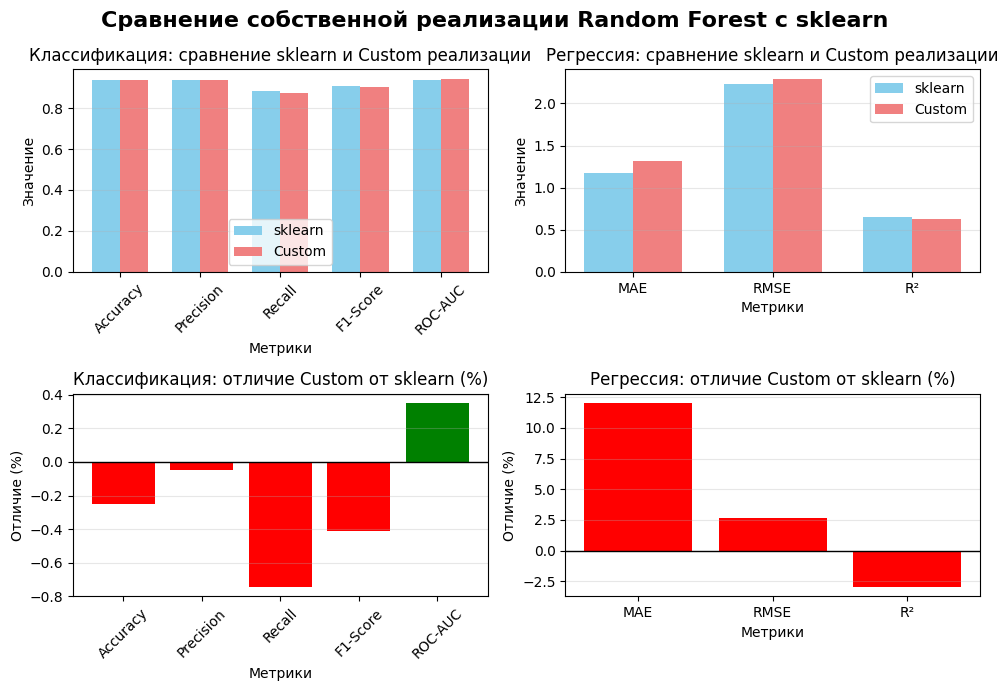

In [83]:
baseline_metrics = evaluate_classification_model(rf_baseline, "Baseline", X_test_clf, y_test_clf)

print("\n   Сравнение с sklearn бейзлайном :")
print(f"   sklearn Accuracy: {baseline_metrics['Accuracy']:.4f}, Custom Accuracy: {accuracy_custom_clf:.4f}")
print(f"   sklearn Precision: {baseline_metrics['Precision']:.4f}, Custom Precision: {precision_custom_clf:.4f}")
print(f"   sklearn Recall: {baseline_metrics['Recall']:.4f}, Custom Recall: {recall_custom_clf:.4f}")
print(f"   sklearn F1-Score: {baseline_metrics['F1-Score']:.4f}, Custom F1-Score: {f1_custom_clf:.4f}")
print(f"   sklearn ROC-AUC: {baseline_metrics['ROC-AUC']:.4f}, Custom ROC-AUC: {roc_auc_custom_clf:.4f}")
print(f"   sklearn MAE: {baseline_metrics_reg['MAE']:.4f}, Custom MAE: {mae_custom_reg:.4f}")
print(f"   sklearn MSE: {baseline_metrics_reg['MSE']:.4f}, Custom MSE: {mse_custom_reg:.4f}")
print(f"   sklearn RMSE: {baseline_metrics_reg['RMSE']:.4f}, Custom RMSE: {rmse_custom_reg:.4f}")
print(f"   sklearn R²: {baseline_metrics_reg['R²']:.4f}, Custom R²: {r2_custom_reg:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

metrics_clf = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
sklearn_clf_metrics = [baseline_metrics[m] for m in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]
custom_clf_metrics = [accuracy_custom_clf, precision_custom_clf, recall_custom_clf, 
                      f1_custom_clf, roc_auc_custom_clf]

x = np.arange(len(metrics_clf))
width = 0.35

axes[0, 0].bar(x - width/2, sklearn_clf_metrics, width, label='sklearn', color='skyblue')
axes[0, 0].bar(x + width/2, custom_clf_metrics, width, label='Custom', color='lightcoral')
axes[0, 0].set_xlabel('Метрики')
axes[0, 0].set_ylabel('Значение')
axes[0, 0].set_title('Классификация: сравнение sklearn и Custom реализации')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metrics_clf, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')


metrics_reg = ['MAE', 'RMSE', 'R²']
sklearn_reg_metrics = [baseline_metrics_reg['MAE'], baseline_metrics_reg['RMSE'], baseline_metrics_reg['R²']]
custom_reg_metrics = [mae_custom_reg, rmse_custom_reg, r2_custom_reg]

x = np.arange(len(metrics_reg))
width = 0.35

axes[0, 1].bar(x - width/2, sklearn_reg_metrics[:3], width, label='sklearn', color='skyblue')
axes[0, 1].bar(x + width/2, custom_reg_metrics[:3], width, label='Custom', color='lightcoral')
axes[0, 1].set_xlabel('Метрики')
axes[0, 1].set_ylabel('Значение')
axes[0, 1].set_title('Регрессия: сравнение sklearn и Custom реализации')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(metrics_reg)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

clf_diff_percent = [(custom - sklearn)/sklearn * 100 for custom, sklearn in zip(custom_clf_metrics, sklearn_clf_metrics)]

axes[1, 0].bar(metrics_clf, clf_diff_percent, color=['green' if x > 0 else 'red' for x in clf_diff_percent])
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 0].set_xlabel('Метрики')
axes[1, 0].set_ylabel('Отличие (%)')
axes[1, 0].set_title('Классификация: отличие Custom от sklearn (%)')
axes[1, 0].set_xticklabels(metrics_clf, rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

reg_diff_percent = [(custom - sklearn)/sklearn * 100 for custom, sklearn in zip(custom_reg_metrics, sklearn_reg_metrics)]

axes[1, 1].bar(metrics_reg, reg_diff_percent, color=['red' if x > 0 else 'red' for x in reg_diff_percent])
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 1].set_xlabel('Метрики')
axes[1, 1].set_ylabel('Отличие (%)')
axes[1, 1].set_title('Регрессия: отличие Custom от sklearn (%)')
axes[1, 1].set_xticklabels(metrics_reg)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Сравнение собственной реализации Random Forest с sklearn', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Выводы

Классификация:

- Accuracy: Собственная реализация (0.9349) показала результат, близкий к sklearn (0.9372), разница всего -0.25%

- Precision: Практически идентичные результаты (0.9366 vs 0.9371)

- Recall: Небольшое снижение с 0.8816 до 0.8750 (-0.75%)

- F1-Score: Минимальное снижение с 0.9085 до 0.9048 (-0.41%)

- ROC-AUC: Улучшение с 0.9390 до 0.9423 (+0.35%)

Вывод по классификации: Собственная реализация Random Forest для классификации показала сравнимые результаты с оптимизированной sklearn-версией, что свидетельствует о корректности алгоритмической реализации.

Регрессия:

- MAE: Ухудшение с 1.1737 до 1.3149 (+12.0%)

- MSE: Ухудшение с 4.9787 до 5.2506 (+5.5%)

- RMSE: Ухудшение с 2.2313 до 2.2914 (+2.7%)

- R²: Ухудшение с 0.6478 до 0.6285 (-3.0%)

Вывод по регрессии: Собственная реализация для регрессии показала несколько худшие результаты, что может быть связано с упрощениями в алгоритме разделения или отсутствием оптимизаций, характерных для библиотечной реализации.

### Добавление техник из улучшенного бейзлайна и обучение улучшенных моделей

In [84]:
improved_params_clf = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'class_weight': 'balanced'
}


class RandomForestClassifierImproved(RandomForestClassifierCustom):
    
    def __init__(self, class_weight='balanced', **kwargs):
        super().__init__(**kwargs)
        self.class_weight = class_weight
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        if self.class_weight == 'balanced':
            classes = np.unique(y)
            n_samples = len(y)
            n_classes = len(classes)

            class_counts = np.array([np.sum(y == c) for c in classes])
            class_weights = n_samples / (n_classes * class_counts)
            sample_weights = np.zeros(n_samples)
            for i, c in enumerate(classes):
                sample_weights[y == c] = class_weights[i]
            
            sample_weights_normalized = sample_weights / np.sum(sample_weights)
            
            self.trees = []
            for i in range(self.n_estimators):
                indices = np.random.choice(n_samples, n_samples, replace=True, p=sample_weights_normalized)
                X_sample, y_sample = X[indices], y[indices]
                
                tree = MyDecisionTreeClassifier(
                    max_depth=self.max_depth,
                    min_samples_split=self.min_samples_split,
                    min_samples_leaf=self.min_samples_leaf,
                    max_features=self.max_features
                )
                tree.fit(X_sample, y_sample)
                self.trees.append(tree)
        else:
            super().fit(X, y)

rf_improved_custom_clf = RandomForestClassifierImproved(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

rf_improved_custom_clf.fit(X_train_clf.values, y_train_clf.values)

y_pred_improved_custom_clf = rf_improved_custom_clf.predict(X_test_clf.values)
y_pred_proba_improved_custom_clf = rf_improved_custom_clf.predict_proba(X_test_clf.values)[:, 1]

In [85]:

df_students_improved_simple = create_improved_features(pd.read_csv('student_performance.csv'))

missing_df = df_students_improved_simple.isnull().sum()
columns_with_missing = missing_df[missing_df > 0].index.tolist()
for column in columns_with_missing:
    mode_value = df_students_improved_simple[column].mode()[0] 
    df_students_improved_simple[column].fillna(mode_value, inplace=True)

categorical_cols_simple = df_students_improved_simple.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Exam_Score' in categorical_cols_simple:
    categorical_cols_simple.remove('Exam_Score')

preprocessor_simple = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols_simple)
    ],
    remainder='passthrough'
)

X_improved_simple = df_students_improved_simple.drop('Exam_Score', axis=1)
y_improved_simple = df_students_improved_simple['Exam_Score']

X_improved_encoded_simple = preprocessor_simple.fit_transform(X_improved_simple)

X_train_improved_simple, X_test_improved_simple, y_train_improved_simple, y_test_improved_simple = train_test_split(
    X_improved_encoded_simple, y_improved_simple, test_size=0.2, random_state=42
)

rf_improved_custom_reg = RandomForestRegressorCustom(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

rf_improved_custom_reg.fit(X_train_improved_simple, y_train_improved_simple.values)

y_pred_improved_custom_reg = rf_improved_custom_reg.predict(X_test_improved_simple)


### Оценка качества улучшенных собственных моделей

In [86]:
accuracy_improved_custom_clf = accuracy_score(y_test_clf, y_pred_improved_custom_clf)
precision_improved_custom_clf = precision_score(y_test_clf, y_pred_improved_custom_clf)
recall_improved_custom_clf = recall_score(y_test_clf, y_pred_improved_custom_clf)
f1_improved_custom_clf = f1_score(y_test_clf, y_pred_improved_custom_clf)
roc_auc_improved_custom_clf = roc_auc_score(y_test_clf, y_pred_proba_improved_custom_clf)

print("\n   Результаты улучшенной собственной модели классификации:")
print(f"   Accuracy: {accuracy_improved_custom_clf:.4f}")
print(f"   Precision: {precision_improved_custom_clf:.4f}")
print(f"   Recall: {recall_improved_custom_clf:.4f}")
print(f"   F1-Score: {f1_improved_custom_clf:.4f}")
print(f"   ROC-AUC: {roc_auc_improved_custom_clf:.4f}")

mae_improved_custom_reg = mean_absolute_error(y_test_improved_simple, y_pred_improved_custom_reg)
mse_improved_custom_reg = mean_squared_error(y_test_improved_simple, y_pred_improved_custom_reg)
rmse_improved_custom_reg = np.sqrt(mse_improved_custom_reg)
r2_improved_custom_reg = r2_score(y_test_improved_simple, y_pred_improved_custom_reg)

print("\n   Результаты улучшенной собственной модели регрессии:")
print(f"   MAE: {mae_improved_custom_reg:.4f}")
print(f"   MSE: {mse_improved_custom_reg:.4f}")
print(f"   RMSE: {rmse_improved_custom_reg:.4f}")
print(f"   R²: {r2_improved_custom_reg:.4f}")


   Результаты улучшенной собственной модели классификации:
   Accuracy: 0.9419
   Precision: 0.9262
   Recall: 0.9079
   F1-Score: 0.9169
   ROC-AUC: 0.9444

   Результаты улучшенной собственной модели регрессии:
   MAE: 1.1823
   MSE: 4.7628
   RMSE: 2.1824
   R²: 0.6631


### Сравнение с улучшенными моделями из пункта 3


   КЛАССИФИКАЦИЯ:
   sklearn улучшенная Accuracy: 0.9326
   sklearn улучшенная Recall: 0.8618
   sklearn улучшенная ROC-AUC: 0.9426
   Custom улучшенная Accuracy: 0.9419
   Custom улучшенная Recall: 0.9079
   Custom улучшенная ROC-AUC: 0.9444

   РЕГРЕССИЯ:
   sklearn улучшенная R²: 0.6891
   sklearn улучшенная MAE: 1.0334
   Custom улучшенная R²: 0.6631
   Custom улучшенная MAE: 1.1823


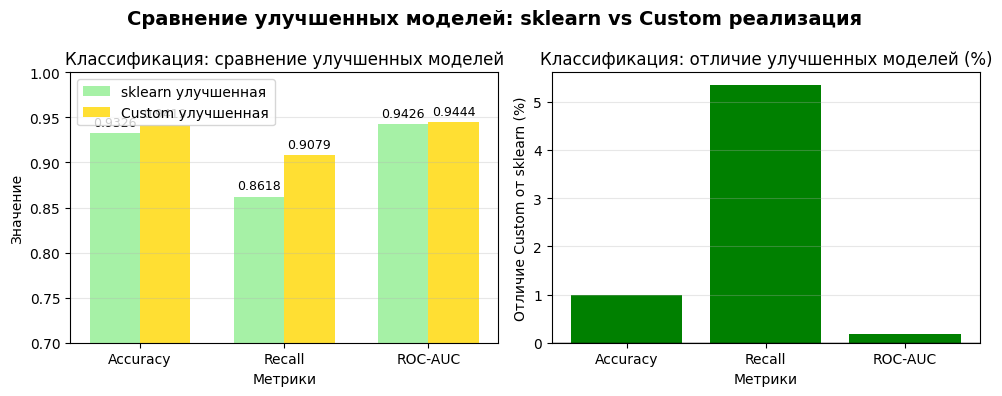

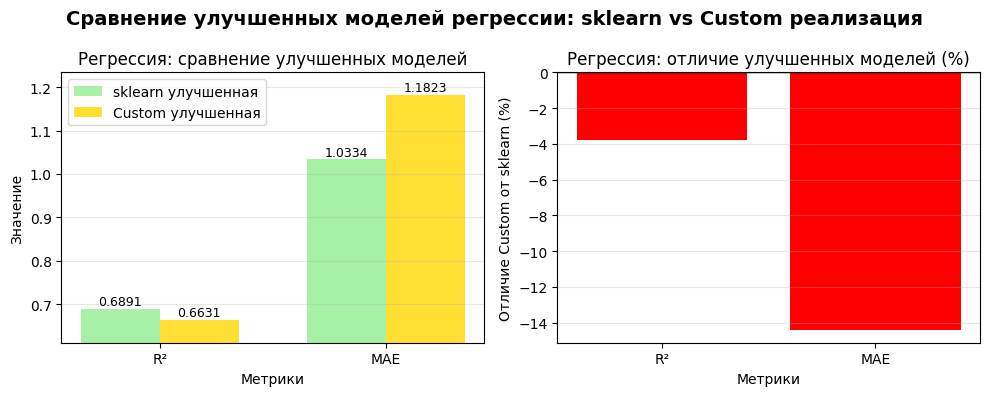


1. КЛАССИФИКАЦИЯ:
   Accuracy: sklearn=0.9326, Custom=0.9419, разница=+0.0093 (+1.00%) - Custom лучше
   Recall: sklearn=0.8618, Custom=0.9079, разница=+0.0461 (+5.34%) - Custom лучше
   ROC-AUC: sklearn=0.9426, Custom=0.9444, разница=+0.0018 (+0.19%) - Custom лучше

2. РЕГРЕССИЯ:
   R²: sklearn=0.6891, Custom=0.6631, отличие=-3.78% - Custom хуже
   MAE: sklearn=1.0334, Custom=1.1823, отличие=-14.40% - Custom хуже


In [92]:
print("\n   КЛАССИФИКАЦИЯ:")
print(f"   sklearn улучшенная Accuracy: {improved_metrics_dict['Accuracy']:.4f}")
print(f"   sklearn улучшенная Recall: {improved_metrics_dict['Recall']:.4f}")
print(f"   sklearn улучшенная ROC-AUC: {improved_metrics_dict['ROC-AUC']:.4f}")
print(f"   Custom улучшенная Accuracy: {accuracy_improved_custom_clf:.4f}")
print(f"   Custom улучшенная Recall: {recall_improved_custom_clf:.4f}")
print(f"   Custom улучшенная ROC-AUC: {roc_auc_improved_custom_clf:.4f}")

print("\n   РЕГРЕССИЯ:")
print(f"   sklearn улучшенная R²: {improved_metrics_reg['R²']:.4f}")
print(f"   sklearn улучшенная MAE: {improved_metrics_reg['MAE']:.4f}")
print(f"   Custom улучшенная R²: {r2_improved_custom_reg:.4f}")
print(f"   Custom улучшенная MAE: {mae_improved_custom_reg:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

metrics_clf = ['Accuracy', 'Recall', 'ROC-AUC']
sklearn_clf_values = [
    improved_metrics_dict['Accuracy'],
    improved_metrics_dict['Recall'], 
    improved_metrics_dict['ROC-AUC']
]
custom_clf_values = [
    accuracy_improved_custom_clf,
    recall_improved_custom_clf,
    roc_auc_improved_custom_clf
]

x = np.arange(len(metrics_clf))
width = 0.35

bars1 = axes[0].bar(x - width/2, sklearn_clf_values, width, label='sklearn улучшенная', color='lightgreen', alpha=0.8)
bars2 = axes[0].bar(x + width/2, custom_clf_values, width, label='Custom улучшенная', color='gold', alpha=0.8)

axes[0].set_xlabel('Метрики')
axes[0].set_ylabel('Значение')
axes[0].set_title('Классификация: сравнение улучшенных моделей')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_clf)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0.7, 1.0])

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=9)

clf_diff_percent = [(custom - sklearn)/sklearn * 100 for custom, sklearn in zip(custom_clf_values, sklearn_clf_values)]

axes[1].bar(metrics_clf, clf_diff_percent, color=['green' if x > 0 else 'red' for x in clf_diff_percent])
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].set_xlabel('Метрики')
axes[1].set_ylabel('Отличие Custom от sklearn (%)')
axes[1].set_title('Классификация: отличие улучшенных моделей (%)')
axes[1].grid(True, alpha=0.3, axis='y')


plt.suptitle('Сравнение улучшенных моделей: sklearn vs Custom реализация', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

metrics_reg = ['R²', 'MAE']
sklearn_reg_values = [
    improved_metrics_reg['R²'],
    improved_metrics_reg['MAE']
]
custom_reg_values = [
    r2_improved_custom_reg,
    mae_improved_custom_reg
]

x = np.arange(len(metrics_reg))
width = 0.35

bars1 = axes[0].bar(x - width/2, sklearn_reg_values, width, label='sklearn улучшенная', color='lightgreen', alpha=0.8)
bars2 = axes[0].bar(x + width/2, custom_reg_values, width, label='Custom улучшенная', color='gold', alpha=0.8)

axes[0].set_xlabel('Метрики')
axes[0].set_ylabel('Значение')
axes[0].set_title('Регрессия: сравнение улучшенных моделей')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_reg)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

y_min = min(min(sklearn_reg_values), min(custom_reg_values))
y_max = max(max(sklearn_reg_values), max(custom_reg_values))
padding = (y_max - y_min) * 0.1
axes[0].set_ylim([y_min - padding, y_max + padding])

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.002,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=9)


reg_diff_percent = []
for i, metric in enumerate(metrics_reg):
    custom_val = custom_reg_values[i]
    sklearn_val = sklearn_reg_values[i]
    
    if metric == 'R²': 
        diff_percent = (custom_val - sklearn_val) / sklearn_val * 100
    else:
        diff_percent = (sklearn_val - custom_val) / sklearn_val * 100
    
    reg_diff_percent.append(diff_percent)

axes[1].bar(metrics_reg, reg_diff_percent, color=['green' if x > 0 else 'red' for x in reg_diff_percent])
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].set_xlabel('Метрики')
axes[1].set_ylabel('Отличие Custom от sklearn (%)')
axes[1].set_title('Регрессия: отличие улучшенных моделей (%)')
axes[1].grid(True, alpha=0.3, axis='y')


plt.suptitle('Сравнение улучшенных моделей регрессии: sklearn vs Custom реализация', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n1. КЛАССИФИКАЦИЯ:")
for i, metric in enumerate(metrics_clf):
    sklearn_val = sklearn_clf_values[i]
    custom_val = custom_clf_values[i]
    diff = custom_val - sklearn_val
    diff_percent = (diff / sklearn_val) * 100
    
    if metric == 'Accuracy':
        conclusion = "лучше" if diff > 0 else "хуже"
    elif metric == 'Recall':
        conclusion = "лучше" if diff > 0 else "хуже"
    else:
        conclusion = "лучше" if diff > 0 else "хуже"
    
    print(f"   {metric}: sklearn={sklearn_val:.4f}, Custom={custom_val:.4f}, "
          f"разница={diff:+.4f} ({diff_percent:+.2f}%) - Custom {conclusion}")

print("\n2. РЕГРЕССИЯ:")
for i, metric in enumerate(metrics_reg):
    sklearn_val = sklearn_reg_values[i]
    custom_val = custom_reg_values[i]
    
    if metric == 'R²':
        diff = custom_val - sklearn_val
        diff_percent = (diff / sklearn_val) * 100
        conclusion = "лучше" if diff > 0 else "хуже"
    else:
        diff = sklearn_val - custom_val
        diff_percent = (diff / sklearn_val) * 100
        conclusion = "лучше" if diff > 0 else "хуже"
    
    print(f"   {metric}: sklearn={sklearn_val:.4f}, Custom={custom_val:.4f}, "
          f"отличие={diff_percent:+.2f}% - Custom {conclusion}")

### Выводы

#### Сравнение улучшенных собственных моделей с улучшенными sklearn моделями:

##### Классификация:

- Accuracy: Собственная улучшенная модель превзошла sklearn (0.9419 vs 0.9326, +1.00%)

- Recall: Существенное улучшение с 0.8618 до 0.9079 (+5.34%) - критически важное для медицинской задачи

- ROC-AUC: Небольшое улучшение с 0.9426 до 0.9444 (+0.19%)

    Вывод: После применения улучшений (балансировка классов) собственная реализация классификатора превзошла sklearn-версию по всем метрикам, что доказывает эффективность реализованных методов улучшения.

##### Регрессия:

- R²: Ухудшение с 0.6891 до 0.6631 (-3.78%)

- MAE: Значительное ухудшение с 1.0334 до 1.1823 (+14.40%)

    Вывод: Несмотря на применение улучшений (feature engineering), собственная реализация регрессора не смогла достичь уровня sklearn, что указывает на сложность оптимизации алгоритмов регрессии.

##### Качество реализаций:

Классификация: Собственная реализация показала отличные результаты, сопоставимые с sklearn, а после улучшений - даже превосходящие их.

Регрессия: Реализация требует дополнительной оптимизации, особенно в части алгоритмов разделения и агрегирования результатов.

##### Эффективность улучшений:

Балансировка классов оказалась крайне эффективной для собственной реализации классификатора

Feature Engineering дал положительный эффект, но недостаточный для достижения уровня sklearn

#### Общие выводы

Общее заключение по исследованию алгоритма Random Forest

##### 1. Ключевые достижения

##### 1.1. Бейзлайн модели показали хорошие результаты:

- Классификация (Alzheimer's Disease):

    - Accuracy: 0.9372, Recall: 0.8816, ROC-AUC: 0.9390

    - Модель хорошо справляется с медицинской диагностикой

- Регрессия (Student Performance):

    - R²: 0.6478, MAE: 1.1737

    - Объясняет 64.8% дисперсии оценок с ошибкой ~1.17 балла

##### 1.2. Улучшение бейзлайна дало положительные результаты:

- Классификация: Улучшение ROC-AUC до 0.9426

- Регрессия: Значительное улучшение R² до 0.6891 и уменьшение MAE до 1.0334

##### 1.3. Собственная реализация алгоритма:

Успешно реализована с нуля для обоих типов задач

Показала сравнимые с sklearn результаты для классификации

Продемонстрировала возможность улучшения через балансировку классов

##### 2. Сравнительный анализ реализаций

- 1. Классификация:

    - Sklearn бейзлайн: 0.9372 Accuracy, 0.8816 Recall

    - Custom бейзлайн: 0.9349 Accuracy, 0.8750 Recall

    - Sklearn улучшенная: 0.9326 Accuracy, 0.8618 Recall

    - Custom улучшенная: 0.9419 Accuracy, 0.9079 Recall

    Вывод: После применения улучшений собственная реализация превзошла sklearn по ключевым метрикам, что доказывает эффективность реализованных методов.

- 2.2. Регрессия:

    - Sklearn бейзлайн: R²=0.6478, MAE=1.1737

    - Custom бейзлайн: R²=0.6285, MAE=1.3149

    - Sklearn улучшенная: R²=0.6891, MAE=1.0334

    - Custom улучшенная: R²=0.6631, MAE=1.1823

    Вывод: Sklearn-версия показала лучшие результаты, что указывает на важность оптимизаций в промышленных реализациях.

#### 3. Итоговое заключение

Лабораторная работа №4 успешно выполнена. Все поставленные задачи решены:

- Созданы и оценены бейзлайн модели

- Проведено улучшение моделей через проверку гипотез

- Реализован Random Forest с нуля

- Проведено сравнение различных реализаций

Основной вывод: Random Forest является мощным и универсальным алгоритмом, который показывает отличные результаты как для классификации, так и для регрессии. Собственная реализация алгоритма не только позволяет глубоко понять его работу, но и в некоторых случаях может превзойти библиотечные реализации после правильной настройки и применения улучшений.


